tb - 6/14/2022 - Compare various models in a (complexity,performance) plane and make large figures for the 23rd AMS AOFD (2022)

# Initialization and Figure parameters

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, LogNorm

import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from scipy.ndimage import uniform_filter

import pandas as pd
import numpy as np
import pickle as pkl
import json

import os
import xarray as xr
import xesmf as xe

In [2]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

/tmp/ipykernel_160809/4125692547.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  green_cmap = cm.get_cmap('YlGn', 5)


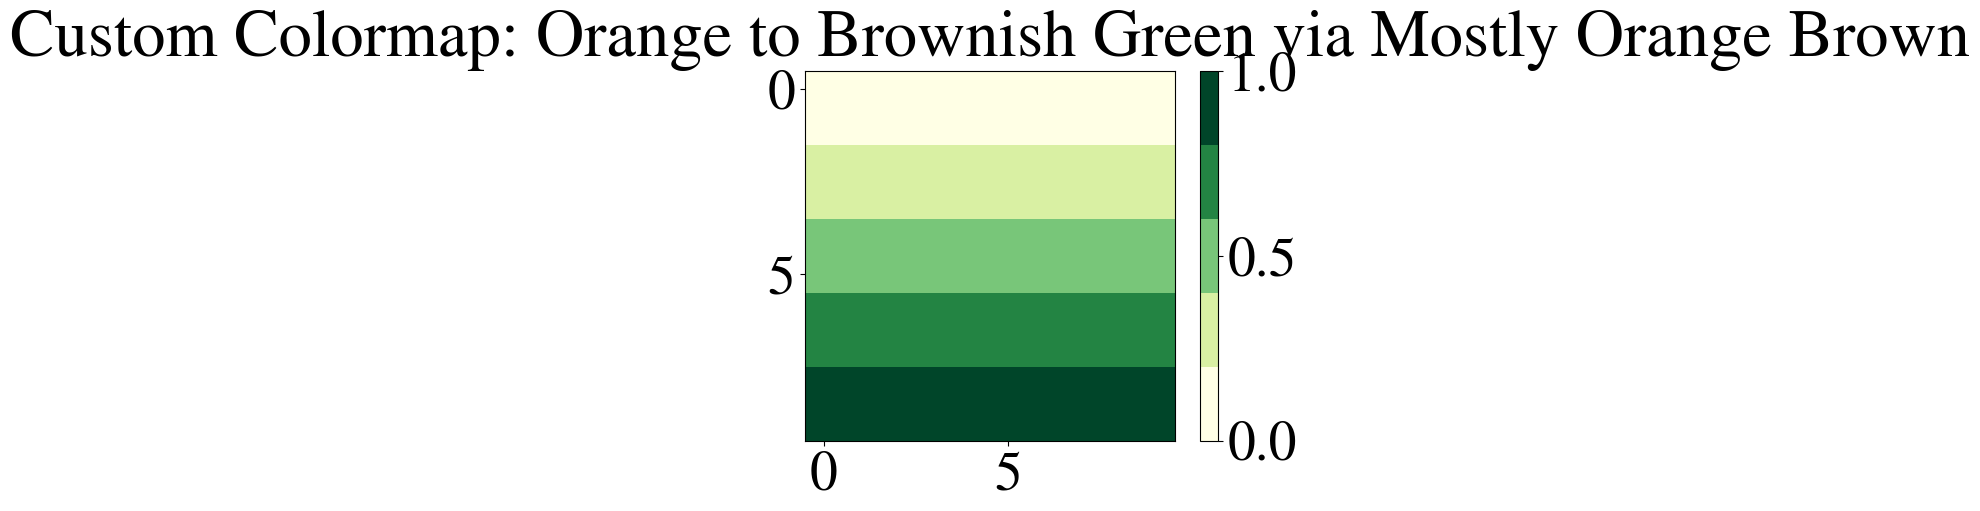

In [3]:
# Define the colors for the distilled model colormap
green_cmap = cm.get_cmap('YlGn', 5)
# Generate some data
data = np.linspace(0, 1, 100).reshape(10, 10)
# Plot the data using the custom colormap
plt.imshow(data, cmap=green_cmap)
plt.colorbar()
plt.title('Custom Colormap: Orange to Brownish Green via Mostly Orange Brown')
plt.show()

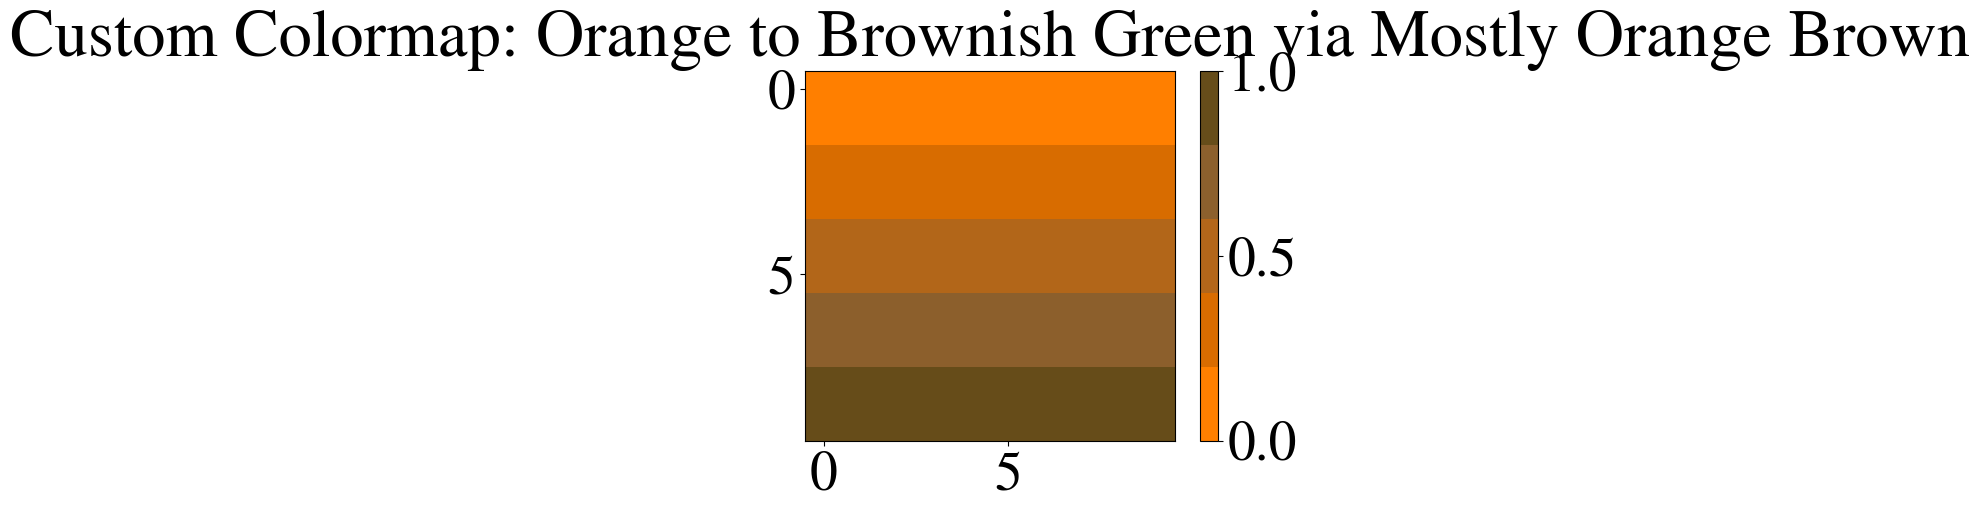

In [4]:
# Define the colors for the NN colormap
colors = [(1.0, 0.5, 0.0),   # Orange
          (0.8, 0.4, 0.0),   # Brown with mostly orange
          (0.6, 0.4, 0.2),   # Brown with some green
          (0.4, 0.3, 0.1)]   # Darker brown

# Create the colormap
orange_cmap = LinearSegmentedColormap.from_list('OrangeToBrownGreen', colors, N=5)

# Generate some data
data = np.linspace(0, 1, 100).reshape(10, 10)

# Plot the data using the custom colormap
plt.imshow(data, cmap=orange_cmap)
plt.colorbar()
plt.title('Custom Colormap: Orange to Brownish Green via Mostly Orange Brown')
plt.show()

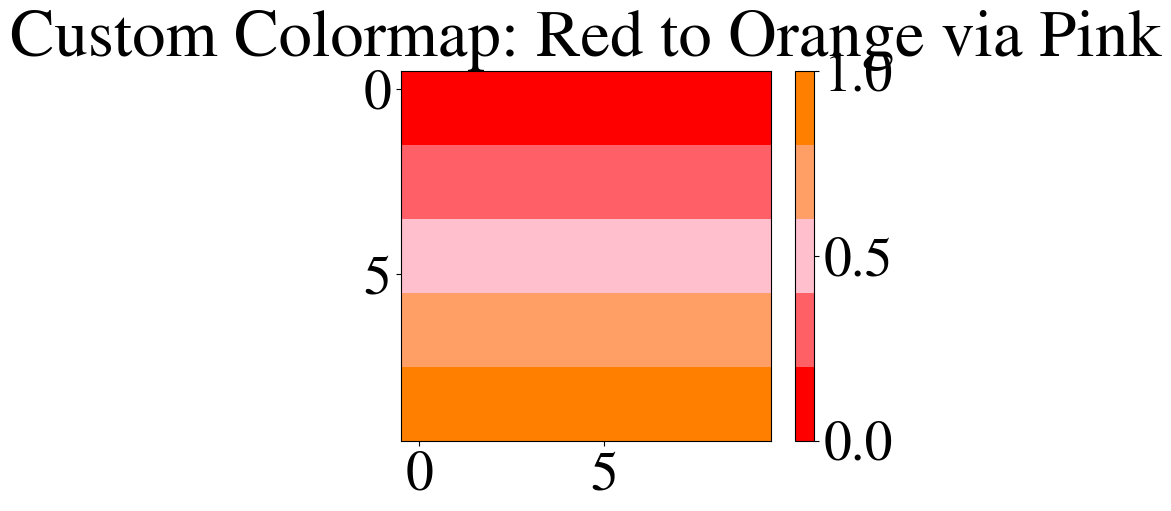

In [5]:
# Define the colors for the colormap
colors = [(1.0, 0.0, 0.0),   # Red
          (1.0, 0.75, 0.8),  # Pink
          (1.0, 0.5, 0.0)]   # Orange

# Create the colormap
red_cmap = LinearSegmentedColormap.from_list('RedPinkOrange', colors, N=5)

# Generate some data
data = np.linspace(0, 1, 100).reshape(10, 10)

# Plot the data using the custom colormap
plt.imshow(data, cmap=red_cmap)
plt.colorbar()
plt.title('Custom Colormap: Red to Orange via Pink')
plt.show()

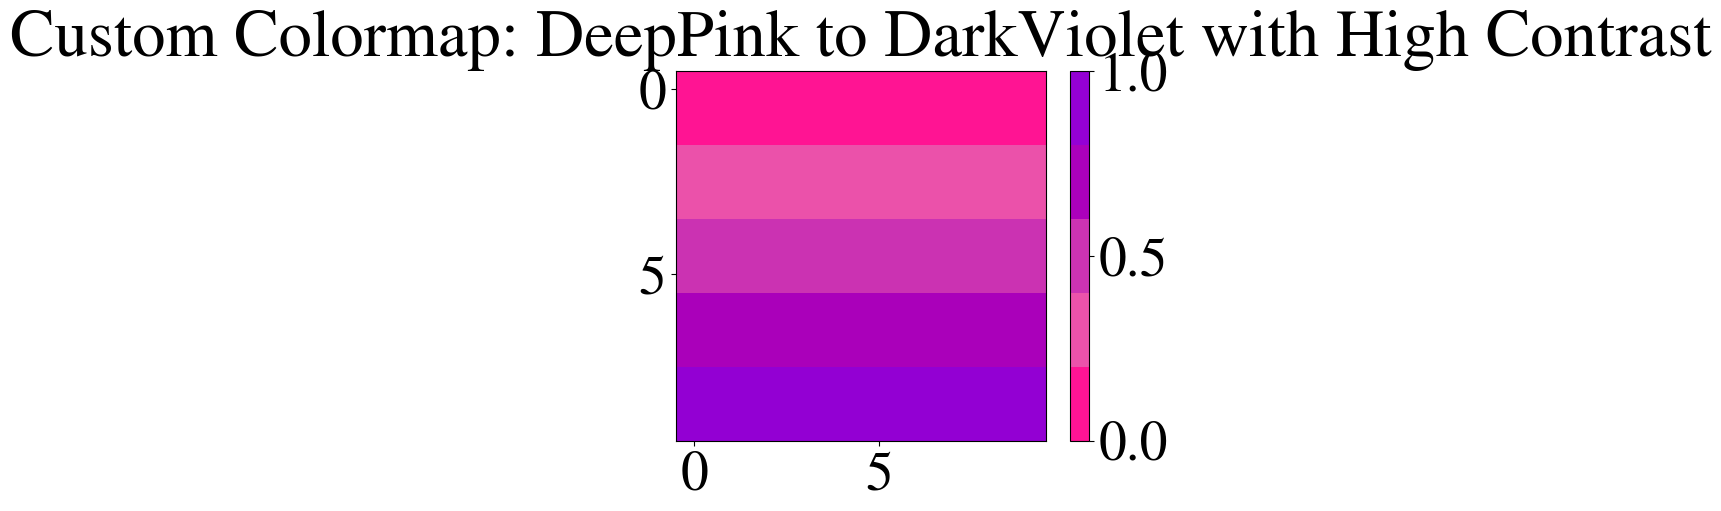

In [6]:
# Define the colors for the colormap with significantly increased contrast
colors = [
    (1.0, 0.08, 0.58),  # DeepPink
    (0.9, 0.4, 0.7),   # Distinct intermediate color
    (0.7, 0.0, 0.7),   # Another distinct intermediate color
    (0.58, 0.0, 0.83)  # DarkViolet
]

# Create the colormap
pink_cmap = LinearSegmentedColormap.from_list('DeepPinkDarkViolet', colors, N=5)

# Generate some data
data = np.linspace(0, 1, 100).reshape(10, 10)

# Plot the data using the custom colormap
plt.imshow(data, cmap=pink_cmap)
plt.colorbar()
plt.title('Custom Colormap: DeepPink to DarkViolet with High Contrast')
plt.show()

# Error statistics for various models

## (OLD) SW radiation

In [7]:
SW = {}

### Empirical parameterization

In [8]:
#SW['emp'] = {}
SW['emp201920'] = {}

In [9]:
# CF['emp']['number_p'] = 3
# CF['emp']['param'] = np.array([0.05213128, 0.00579355, 0.00343533])
# CF['emp']['MSE_train'] = 1064.4172
# CF['emp']['MSE_test'] = 2161.1487


In [10]:
SW['emp201920']['number_p'] = 3
SW['emp201920']['param'] = np.array([0.05319668, 0.00607786, 0.00352458])
SW['emp201920']['MSE_train'] = 1076.68
SW['emp201920']['MSE_test'] = 2412.6987
SW['emp201920']['Sample_train'] = 1929646
SW['emp201920']['Sample_test'] = 260300

### U-net ++

In [11]:
SW['Unet++'] = {}

In [12]:
SW['Unet++']['number_p'] = 14937052

Caveat: This is an estimation of the error based on 200000 samples from each year, noting that the U-net++ was optimized for the heating rates and not the fluxes, so the flux version would likely do better

In [13]:
SW['Unet++']['MSE_train'] = 10.23699176290765
SW['Unet++']['MSE_test'] = 159.293249502594

### Linear models

In [14]:
path_poly_fits = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Polynomial_Fits/'

In [15]:
path_linear = path_poly_fits+'2022_06_14_deg1_cv2'

In [16]:
tmp = pkl.load(open(path_linear,'rb'))

In [17]:
#tmp

In [18]:
for key in tmp.keys():
    ind_space = key.rfind(' ')
    new_key = 'Lin_'+key[ind_space+1:]
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = tmp[key]['MSE_train']
    SW[new_key]['MSE_test'] = tmp[key]['MSE_test']
    SW[new_key]['number_p'] = int(key[ind_space+1:])

### Quadratic models

In [19]:
path_quadratic = path_poly_fits+'2022_06_14_deg2_cv2'
path_quadratic_all = path_poly_fits+'2022_06_14_deg2_all_cv2'

In [20]:
tmp = pkl.load(open(path_quadratic,'rb'))

In [21]:
#tmp

In [22]:
for key in tmp.keys():
    ind_space = key.rfind(' ')
    new_key = 'Quad_'+key[ind_space+1:]
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = tmp[key]['MSE_train']
    SW[new_key]['MSE_test'] = tmp[key]['MSE_test']
    SW[new_key]['number_p'] = int(key[ind_space+1:])

In [23]:
tmp = pkl.load(open(path_quadratic_all,'rb'))

In [24]:
new_key = 'Quad_78'

In [25]:
SW[new_key] = {}
SW[new_key]['MSE_train'] = tmp['MSE_train']
SW[new_key]['MSE_test'] = tmp['MSE_test']
SW[new_key]['number_p'] = 79

### Cubic models

In [26]:
path_cubic = path_poly_fits+'2022_06_14_deg3_cv2'
path_cubic_all = path_poly_fits+'2022_06_14_deg3_all_cv2'

In [27]:
for i in range(7):
    if i==0: dic = {'p RH': -0.4822756120218817, 'LR_Bias': 0.9024607506072879, 'mse_train': 0.019048508576406897, 'mse_test': 0.023078014485909445, 'MSE_train': 4253.850931509128, 'MSE_test': 16946.97581075629}
    elif i==1: dic = {'p RH': -0.38004582817768684, 'albedo^2 p': -0.43955220869825473, 'LR_Bias': 0.9187550574437138, 'mse_train': 0.013977500743757051, 'mse_test': 0.013489997562172791, 'MSE_train': 2163.3306372469074, 'MSE_test': 7289.725072306403}
    elif i==2: dic = {'QLup': -3.587518905192296, 'p RH': -0.3012835287314158, 'albedo^2 p': -0.49961734583205464, 'LR_Bias': 0.9106828305818481, 'mse_train': 0.009741659842438851, 'mse_test': 0.008088753669460836, 'MSE_train': 1335.304195182617, 'MSE_test': 3956.149456598277}
    elif i==3: dic = {'QLup': -3.384120253133853, 'p QLdo': -4.333831885300157, 'p RH': -0.292798980870117, 'albedo^2 p': -0.5090229168821209, 'LR_Bias': 0.9208187224623304, 'mse_train': 0.007403120429805996, 'mse_test': 0.0063799143472923914, 'MSE_train': 1012.9890503784578, 'MSE_test': 2870.290123904773}
    elif i==4: dic = {'cos_za': 0.17245283933152206, 'QLup': -3.3804399966139638, 'p QLdo': -4.329471663763503, 'p RH': -0.3041398120866533, 'albedo^2 p': -0.43368830490818855, 'LR_Bias': 0.8530731187415826, 'mse_train': 0.00575411056942293, 'mse_test': 0.004512980975447759, 'MSE_train': 709.0689576499013, 'MSE_test': 1470.10937856905}
    elif i==5: dic = {'cos_za': 0.17146928047061902, 'QLup': -5.5620419041785585, 'p QLdo': -4.256517177058628, 'p RH': -0.28072064992702717, 'albedo^2 p': -0.445432020642893, 'QLup^2 RH': 10.537654373618613, 'LR_Bias': 0.8505643717706675, 'mse_train': 0.004843531906139132, 'mse_test': 0.0035876120526334852, 'MSE_train': 607.4477449136311, 'MSE_test': 1285.7283375140992}
    elif i==6: dic = {'cos_za': 0.196510896975951, 'QLup': -5.784680125585407, 'p T': -0.20178857630873148, 'p QLdo': -4.411178357488806, 'p RH': -0.14005708774344705, 'albedo^2 p': -0.4606599100538826, 'QLup^2 RH': 11.056780131041556, 'LR_Bias': 0.8675793487831843, 'mse_train': 0.003908292989479232, 'mse_test': 0.0030441254230503846, 'MSE_train': 444.6971678548561, 'MSE_test': 1250.3826502668494}
    
    new_key = 'Cubic_'+str(int(i+1))
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = dic['MSE_train']
    SW[new_key]['MSE_test'] = dic['MSE_test']
    SW[new_key]['number_p'] = i+2

In [28]:
# Features selected by forward sequential selection: ['p RH']
# {'p RH': -0.4822756120218817, 'LR_Bias': 0.9024607506072879, 'mse_train': 0.019048508576406897, 'mse_test': 0.023078014485909445, 'MSE_train': 4253.850931509128, 'MSE_test': 16946.97581075629}
# Features selected by forward sequential selection: ['p RH', 'albedo^2 p']
# {'p RH': -0.38004582817768684, 'albedo^2 p': -0.43955220869825473, 'LR_Bias': 0.9187550574437138, 'mse_train': 0.013977500743757051, 'mse_test': 0.013489997562172791, 'MSE_train': 2163.3306372469074, 'MSE_test': 7289.725072306403}
# Features selected by forward sequential selection: ['QLup', 'p RH', 'albedo^2 p']
# {'QLup': -3.587518905192296, 'p RH': -0.3012835287314158, 'albedo^2 p': -0.49961734583205464, 'LR_Bias': 0.9106828305818481, 'mse_train': 0.009741659842438851, 'mse_test': 0.008088753669460836, 'MSE_train': 1335.304195182617, 'MSE_test': 3956.149456598277}
# Features selected by forward sequential selection: ['QLup', 'p QLdo', 'p RH', 'albedo^2 p']
# {'QLup': -3.384120253133853, 'p QLdo': -4.333831885300157, 'p RH': -0.292798980870117, 'albedo^2 p': -0.5090229168821209, 'LR_Bias': 0.9208187224623304, 'mse_train': 0.007403120429805996, 'mse_test': 0.0063799143472923914, 'MSE_train': 1012.9890503784578, 'MSE_test': 2870.290123904773}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p QLdo', 'p RH', 'albedo^2 p']
# {'cos_za': 0.17245283933152206, 'QLup': -3.3804399966139638, 'p QLdo': -4.329471663763503, 'p RH': -0.3041398120866533, 'albedo^2 p': -0.43368830490818855, 'LR_Bias': 0.8530731187415826, 'mse_train': 0.00575411056942293, 'mse_test': 0.004512980975447759, 'MSE_train': 709.0689576499013, 'MSE_test': 1470.10937856905}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p QLdo', 'p RH', 'albedo^2 p', 'QLup^2 RH']
# {'cos_za': 0.17146928047061902, 'QLup': -5.5620419041785585, 'p QLdo': -4.256517177058628, 'p RH': -0.28072064992702717, 'albedo^2 p': -0.445432020642893, 'QLup^2 RH': 10.537654373618613, 'LR_Bias': 0.8505643717706675, 'mse_train': 0.004843531906139132, 'mse_test': 0.0035876120526334852, 'MSE_train': 607.4477449136311, 'MSE_test': 1285.7283375140992}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p T', 'p QLdo', 'p RH', 'albedo^2 p', 'QLup^2 RH']
# {'cos_za': 0.196510896975951, 'QLup': -5.784680125585407, 'p T': -0.20178857630873148, 'p QLdo': -4.411178357488806, 'p RH': -0.14005708774344705, 'albedo^2 p': -0.4606599100538826, 'QLup^2 RH': 11.056780131041556, 'LR_Bias': 0.8675793487831843, 'mse_train': 0.003908292989479232, 'mse_test': 0.0030441254230503846, 'MSE_train': 444.6971678548561, 'MSE_test': 1250.3826502668494}

In [29]:
tmp = pkl.load(open(path_cubic_all,'rb'))

In [30]:
new_key = 'Cubic_364'

In [31]:
SW[new_key] = {}
SW[new_key]['MSE_train'] = tmp['MSE_train']
SW[new_key]['MSE_test'] = tmp['MSE_test']
SW[new_key]['number_p'] = 365

### GFS dataset

In [32]:
path_Ryan_models = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2022_Ryan_GFS_Dataset/'

In [33]:
Ryan_GFS_models = pd.read_csv(open(path_Ryan_models+'results_summary.csv','rb'),delimiter=', ')

/tmp/ipykernel_160809/701997197.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Ryan_GFS_models = pd.read_csv(open(path_Ryan_models+'results_summary.csv','rb'),delimiter=', ')


## (2024) Cloud fraction

### QUBICC

In [34]:
path_Arthur = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Arthur/'

In [35]:
mse_scores = pkl.load(open(path_Arthur+'mse_scores.pkl','rb'))
no_param = pkl.load(open(path_Arthur+'no_parameters.pkl','rb'))


In [36]:
no_param['sq_man_tun'] = 8 # Because separately calibrated over land and ocean

In [37]:
mse_scores.keys()

dict_keys(['column_NN', 'region_NN', 'cell_NN', 'pol_deg_3', 'pol_deg_3_feat_6', 'pol_deg_2', 'pol_deg_2_feat_5', 'lin_2', 'lin_3', 'lin_4', 'lin_5', 'lin_6', 'lin_7', 'lin_8', 'lin_9', 'lin_10', 'lin_11', 'lin_12', 'lin_13', 'lin_14', 'lin_15', 'lin_16', 'lin_17', 'lin_18', 'sq_man_tun'])

### DYAMOND

In [38]:
dyamond = json.load(open(path_Arthur+'cl_area_pareto_frontier.json','rb'))

In [39]:
dyamond.keys()

dict_keys(['Complexity/Number of parameters', 'MSE scores on validation set'])

In [40]:
dyamond['Complexity/Number of parameters'].keys()

dict_keys(['lin_cl_area_2', 'lin_cl_area_3', 'lin_cl_area_4', 'lin_cl_area_5', 'lin_cl_area_6', 'lin_cl_area_7', 'lin_cl_area_8', 'lin_cl_area_9', 'lin_cl_area_10', 'lin_cl_area_11', 'lin_cl_area_12', 'lin_cl_area_13', 'lin_cl_area_14', 'lin_cl_area_15', 'lin_cl_area_16', 'lin_cl_area_17', 'lin_cl_area_18', 'lin_cl_area_19', 'lin_cl_area_20', 'lin_cl_area_21', 'lin_cl_area_22', 'lin_cl_area_23', 'pol_deg_2_cl_area_1', 'pol_deg_2_cl_area_2', 'pol_deg_2_cl_area_3', 'pol_deg_2_cl_area_4', 'pol_deg_2_cl_area_5', 'pol_deg_2_cl_area_6', 'pol_deg_2_cl_area_7', 'pol_deg_2_cl_area_8', 'pol_deg_2_cl_area_9', 'pol_deg_2_cl_area_10', 'pol_deg_2_cl_area_11', 'pol_deg_2_cl_area_12', 'pol_deg_2_cl_area_13', 'pol_deg_2_cl_area_14', 'pol_deg_2_cl_area_15', 'pol_deg_2_cl_area_16', 'pol_deg_2_cl_area_17', 'pol_deg_2_cl_area_18', 'pol_deg_2_cl_area_19', 'pol_deg_2_cl_area_20', 'pol_deg_2_cl_area_21', 'pol_deg_2_cl_area_22', 'pol_deg_2_cl_area_23', 'pol_deg_2_cl_area_24', 'pol_deg_2_cl_area_25', 'pol_deg_3

### DYAMOND - Dec 2022

In [41]:
path_Arthur22 = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Arthur_data_122022/'

In [42]:
dyamond22 = json.load(open(path_Arthur22+'pareto_frontier/cl_area_pareto_frontier.json'))

In [43]:
dyamond22.keys()

dict_keys(['Complexity/Number of parameters', 'MSE scores on validation set'])

In [44]:
dyamond22['Complexity/Number of parameters'].keys()

dict_keys(['lin_cl_area_1', 'lin_cl_area_2', 'lin_cl_area_3', 'lin_cl_area_4', 'lin_cl_area_5', 'lin_cl_area_6', 'lin_cl_area_7', 'lin_cl_area_8', 'lin_cl_area_9', 'lin_cl_area_10', 'lin_cl_area_11', 'lin_cl_area_12', 'lin_cl_area_13', 'lin_cl_area_14', 'lin_cl_area_15', 'lin_cl_area_16', 'lin_cl_area_17', 'lin_cl_area_18', 'lin_cl_area_19', 'lin_cl_area_20', 'lin_cl_area_21', 'lin_cl_area_22', 'lin_cl_area_23', 'pol_deg_2_cl_area_1', 'pol_deg_2_cl_area_2', 'pol_deg_2_cl_area_3', 'pol_deg_2_cl_area_4', 'pol_deg_2_cl_area_5', 'pol_deg_2_cl_area_6', 'pol_deg_2_cl_area_7', 'pol_deg_2_cl_area_8', 'pol_deg_2_cl_area_9', 'pol_deg_2_cl_area_10', 'pol_deg_2_cl_area_11', 'pol_deg_2_cl_area_12', 'pol_deg_2_cl_area_13', 'pol_deg_2_cl_area_14', 'pol_deg_2_cl_area_15', 'pol_deg_2_cl_area_16', 'pol_deg_2_cl_area_17', 'pol_deg_2_cl_area_18', 'pol_deg_2_cl_area_19', 'pol_deg_2_cl_area_20', 'pol_deg_2_cl_area_21', 'pol_deg_2_cl_area_22', 'pol_deg_2_cl_area_23', 'pol_deg_2_cl_area_24', 'pol_deg_2_cl_are

# (Performance,Complexity) Plots

## Cloud fraction with DYAMOND - Dec 2022

In [20]:
# fig, ax = plt.subplots(1,1,figsize=(15,6))

# for k in dyamond22['Complexity/Number of parameters'].keys():
#     if 'lin_cl_area' in k: col = Green3_cmap(1); m='.'; skip = 0
#     elif 'deg_1_no_reg_2' in k: col = Green3_cmap(1); m='*'; skip = 0
#     elif 'grid_search' in k: col = 'orange'; skip = 0
#     elif 'pol_deg_2' in k: col = Green3_cmap(2); m='.'; skip = 0;
#     elif 'deg_2_no_reg_2' in k: col = Green3_cmap(2); m='*'; skip = 0
#     elif 'pol_deg_3' in k: col = Green3_cmap(3); m='.'; skip = 0;
#     elif 'deg_3_no_reg_2' in k: col = Green3_cmap(3); m='*'; skip = 0
#     elif 'cell_NN' in k: col = 'purple'; m='.'; skip = 0
#     elif 'seq_feat_sel_NN' in k: col = 'mediumturquoise'; m='.'; skip=0;
#     elif 'pysr' in k: col = 'lightsteelblue'; m='.';skip = 0
#     elif 'gpgomea' in k: col = 'gray'; m='.'; skip = 0
#     else: 
#         if 'NN' in k: col = 'b'; m = '.'; skip = 0
#         else: skip = 1
#     if skip==0:
#         ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
#                dyamond22['MSE scores on validation set'][k],
#                s=siz,color=col,zorder=1,marker=m)
# plt.ylabel('Mean-Squared Error (%)$^{2}$')
# plt.xlabel('Number of Parameters')
# plt.draw()

# labels = [item.get_text() for item in ax.get_xticklabels()]
# new_labels = []
# for label in labels:
#     label = '$10^{'+label+'}$'
#     new_labels = np.concatenate((new_labels,[label]))
# ax.set_xticklabels(new_labels);

# ax.set_ylim((0,699))

# YLIM0 = ax.get_ylim()
# XLIM0 = ax.get_xlim()

## Drawing the hierarchy and Pareto front using Figure 1's conventions

In [45]:
colors_fig1 = {
    "pale_blue": [222, 238, 248],
    "light_blue": [190, 223, 239],
    "medium_blue": [131, 197, 217],
    "deep_blue": [53, 144, 173],
    "dark_blue": [32, 88, 106]
}

# Convert each color component by dividing by 255
normalized_colors = {
    key: [value / 255 for value in values]
    for key, values in colors_fig1.items()
}
colors_fig1 = normalized_colors

In [46]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

### Pareto functions

In [47]:
# Function to determine Pareto optimal points

def is_pareto_efficient_simple(costs):

    """
    Identify the Pareto-efficient points for a given set of costs.

    Parameters:
    costs (np.array): A 2D NumPy array where each row represents an individual point
                      in terms of its cost dimensions. For instance, each row could
                      represent a different configuration's cost as [cost1, cost2].

    Returns:
    np.array: A boolean array where True indicates that the corresponding point in
              'costs' is Pareto efficient.

    Description:
    This function iterates over each point and determines whether it is dominated
    by any other point. A point is considered Pareto efficient if no other point
    exists that is better in all cost dimensions. In this context, "better" is
    defined as being lower for each cost dimension since we are minimizing.

    The function uses a boolean array, `is_efficient`, to keep track of which
    points are currently considered Pareto efficient. Initially, all points are
    assumed to be Pareto efficient.

    For each point:
    1. If the point is still considered potentially Pareto efficient (`is_efficient[i]` is True),
       it checks against all other points that are also still marked as efficient.
    2. It updates the `is_efficient` array by setting it to False for any point
       that is dominated by the current point. A point `j` is dominated by point `i`
       if all its cost dimensions are greater than or equal to those of point `i`
       and at least one dimension is strictly greater.
    3. It ensures the current point's efficiency status remains True regardless of the
       comparison outcome by resetting `is_efficient[i]` to True after the comparison.

    The loop ensures that every point is compared with all others, and after processing,
    the `is_efficient` array flags only those points that are not dominated by any other,
    indicating the Pareto front.
    """

    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1)  
            is_efficient[i] = True  
    return is_efficient

In [48]:
def extract_pareto_data(dataframe, key_substrings, 
                        original_dict=None, new_point_1_mse_scores=700, new_point_2_parameters=5.4,
                        key_x='Complexity/Number of parameters', key_y='MSE scores on validation set'):
    # Set default for original_dict if not provided
    if original_dict is None:
        original_dict = dyamond22[key_x].keys()

    # Filter keys by substrings
    filtered_keys = {
        key for key in original_dict
        if any(sub in key for sub in key_substrings)
    }

    # Extract parameters and MSE scores for the filtered models
    parameters = [np.log10(dataframe[key_x][k]) for k in filtered_keys]
    mse_scores = [dataframe[key_y][k] for k in filtered_keys]

    # Determine Pareto optimal points
    pareto_points = is_pareto_efficient_simple(np.column_stack((parameters, mse_scores)))

    # Extract current Pareto points
    pareto_parameters = np.array(parameters)[pareto_points]
    pareto_mse_scores = np.array(mse_scores)[pareto_points]

    # Sort the initial Pareto points based on parameters
    sorted_indices = np.argsort(pareto_parameters)
    pareto_parameters = pareto_parameters[sorted_indices]
    pareto_mse_scores = pareto_mse_scores[sorted_indices]

    # Define new points
    new_point_1_parameters = min(parameters)  # Minimum of all parameters
    new_point_2_mse_scores = min(mse_scores)  # Minimum of all scores

    # Insert new point 1 at the beginning
    pareto_parameters = np.insert(pareto_parameters, 0, new_point_1_parameters)
    pareto_mse_scores = np.insert(pareto_mse_scores, 0, new_point_1_mse_scores)

    # Append new point 2 at the end
    pareto_parameters = np.append(pareto_parameters, new_point_2_parameters)
    pareto_mse_scores = np.append(pareto_mse_scores, new_point_2_mse_scores)

    return parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys

### Figure 2 - Step 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


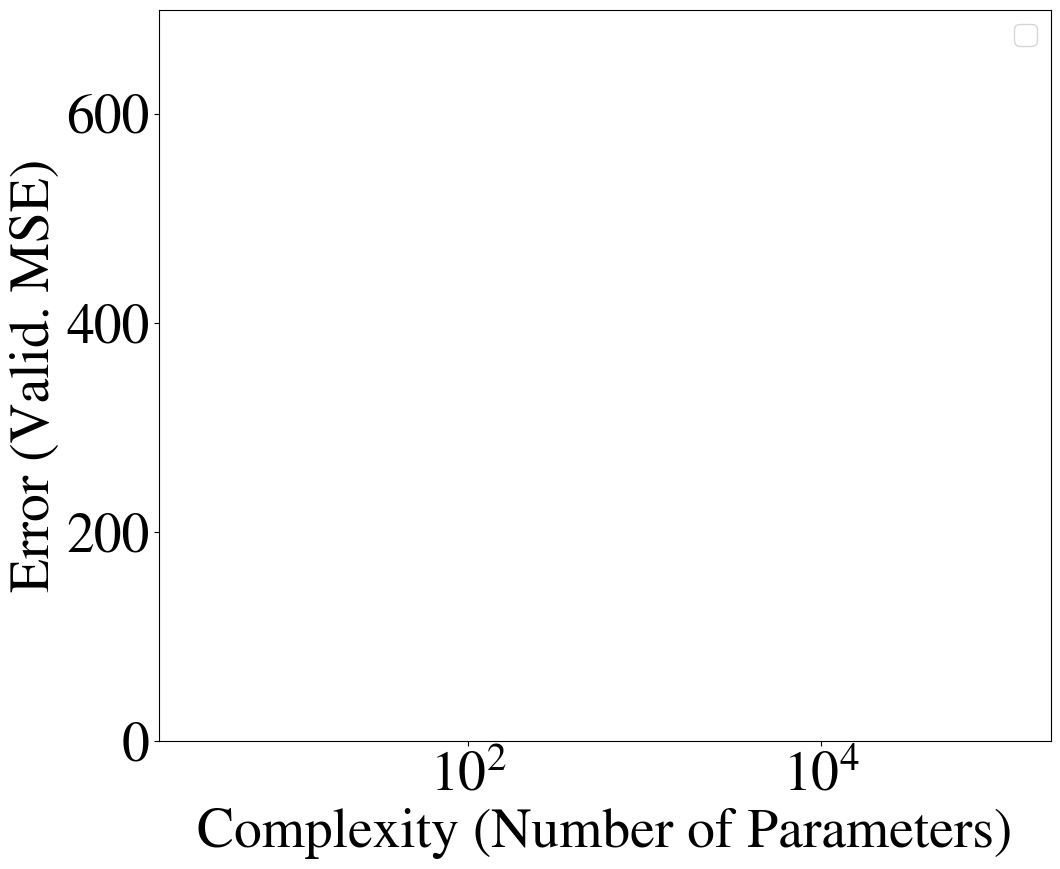

In [49]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Set limits
ax.set_xlim((0.25, 5.3))
ax.set_ylim((0, 699))

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Valid. MSE)')
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2)

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 2 - Step 1

In [50]:
parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys = \
    extract_pareto_data(dyamond22, key_substrings = [
        'lin_cl_area', 'deg_12', 'grid_search','sq','deg_2', 'deg_3'])

In [51]:
for k in filtered_keys:
    p = dyamond22['Complexity/Number of parameters'][k]
    mse = dyamond22['MSE scores on validation set'][k]
    print(f"{k}, Number of parameters={p}, MSE={mse}")

deg_3_no_reg_2_no_var_10, Number of parameters=12, MSE=190.78
deg_2_no_reg_3_no_var_6, Number of parameters=15, MSE=204.39
deg_3_no_reg_4_no_var_3, Number of parameters=13, MSE=227.57
sq_bfgs_regimes, Number of parameters=9, MSE=426.30260920433767
pol_deg_2_cl_area_8, Number of parameters=9, MSE=279.74
pol_deg_3_cl_area_9, Number of parameters=10, MSE=252.96
deg_2_no_reg_3_no_var_1, Number of parameters=5, MSE=458.96
deg_3_no_reg_3_no_var_2, Number of parameters=7, MSE=351.68
lin_cl_area_5, Number of parameters=6, MSE=438.92
deg_3_no_reg_4_no_var_4, Number of parameters=16, MSE=215.02
pol_deg_2_cl_area_6, Number of parameters=7, MSE=306.19
deg_2_no_reg_3_no_var_3, Number of parameters=9, MSE=251.54
pol_deg_3_cl_area_8, Number of parameters=9, MSE=263.7
deg_3_no_reg_4_no_var_7, Number of parameters=25, MSE=180.05
deg_2_no_reg_2_no_var_1, Number of parameters=3, MSE=502.74
deg_2_no_reg_4_no_var_10, Number of parameters=34, MSE=169.47
deg_3_no_reg_3_no_var_7, Number of parameters=17, MSE=

k= teixeira_grid_search


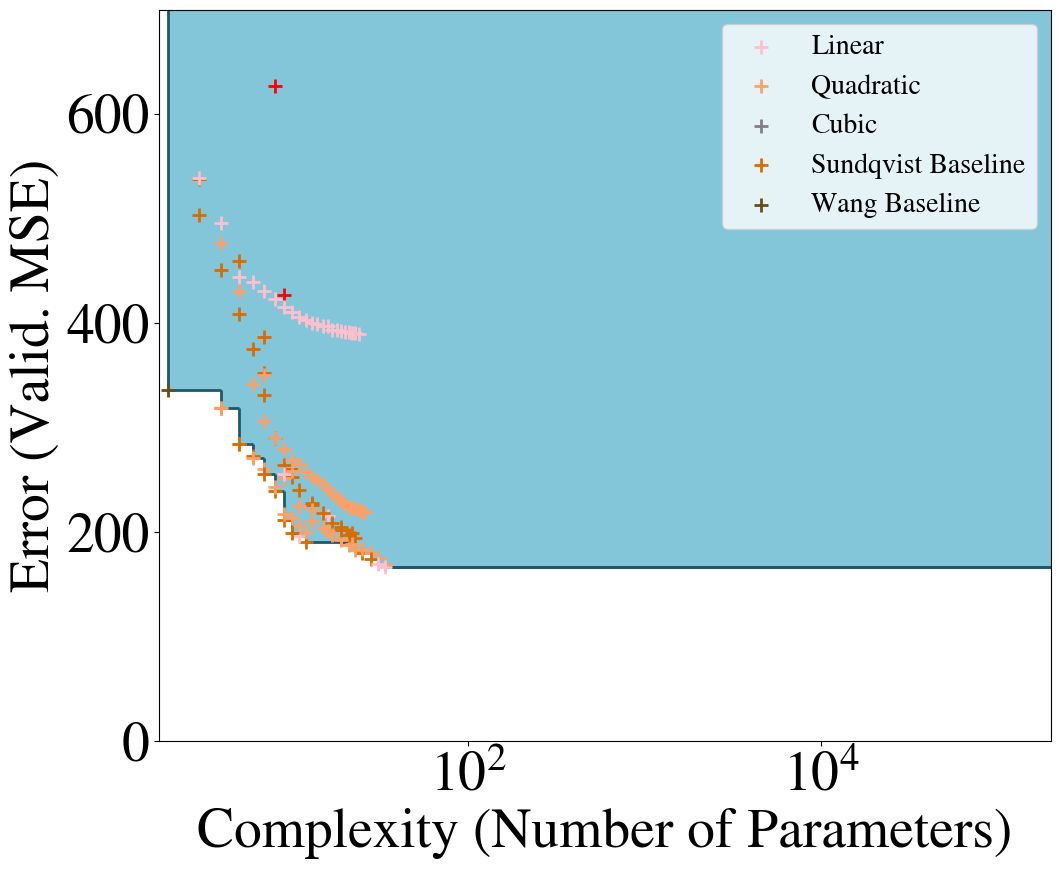

In [52]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
cap = '' # Initialize caption
for k in filtered_keys:
    skip = 0
    if 'lin_cl_area' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'deg_1' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'sq_grid_search' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'Sundqvist Baseline'; skip = 0
    elif 'wang_grid_search' in k: col = orange_cmap(4); m='+'; cap = 'Wang Baseline'; skip = 0
    elif 'pol_deg_2' in k: col = red_cmap(3); m='+'; cap = 'Quadratic'; skip = 0
    elif 'deg_2' in k: col = red_cmap(3); m='+'; cap = ''; skip = 0
    elif 'pol_deg_3' in k: col = orange_cmap(1); m='+'; cap = 'Cubic'; skip = 0
    elif 'deg_3' in k: col = orange_cmap(1); m='+'; skip = 0
    elif 'cell_NN' in k: col = pink_cmap(1); m='+'; cap = 'Neural Network (NN) Baseline'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = pink_cmap(5); m='+'; cap = 'NN with Sequentially Selected Features'; skip=0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 0
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
               dyamond22['MSE scores on validation set'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((0.25, 5.3))
ax.set_ylim((0, 699))

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Valid. MSE)')
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Ensure the color of 'Linear' is red_cmap(2)
for handle, label in zip(handles, labels):
    if label == 'Linear':
        handle.set_color(red_cmap(2))

new_labels = ['Linear', 'Quadratic', 'Cubic', 'Sundqvist Baseline', 'Wang Baseline']
new_handles = [by_label[label] for label in new_labels]
plt.legend(new_handles, new_labels,fontsize=fz/2)

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 2 - Step 2

In [53]:
parameters2, mse_scores2, pareto_parameters2, pareto_mse_scores2, filtered_keys2 = \
    extract_pareto_data(dyamond22, key_substrings = [
        'lin_cl_area', 'deg_12', 'grid_search','sq','deg_2', 'deg_3',
        'NN'])

In [54]:
for k in filtered_keys2:
    p = dyamond22['Complexity/Number of parameters'][k]
    mse = dyamond22['MSE scores on validation set'][k]
    print(f"{k}, Number of parameters={p}, MSE={mse}")

deg_3_no_reg_2_no_var_10, Number of parameters=12, MSE=190.78
seq_feat_sel_NN_6, Number of parameters=673, MSE=55.7913
deg_2_no_reg_3_no_var_6, Number of parameters=15, MSE=204.39
deg_3_no_reg_4_no_var_3, Number of parameters=13, MSE=227.57
sq_bfgs_regimes, Number of parameters=9, MSE=426.30260920433767
pol_deg_2_cl_area_8, Number of parameters=9, MSE=279.74
pol_deg_3_cl_area_9, Number of parameters=10, MSE=252.96
deg_2_no_reg_3_no_var_1, Number of parameters=5, MSE=458.96
deg_3_no_reg_3_no_var_2, Number of parameters=7, MSE=351.68
lin_cl_area_5, Number of parameters=6, MSE=438.92
deg_3_no_reg_4_no_var_4, Number of parameters=16, MSE=215.02
pol_deg_2_cl_area_6, Number of parameters=7, MSE=306.19
deg_2_no_reg_3_no_var_3, Number of parameters=9, MSE=251.54
seq_feat_sel_NN_9, Number of parameters=9281, MSE=37.041
pol_deg_3_cl_area_8, Number of parameters=9, MSE=263.7
deg_3_no_reg_4_no_var_7, Number of parameters=25, MSE=180.05
deg_2_no_reg_2_no_var_1, Number of parameters=3, MSE=502.74
de

k= teixeira_grid_search


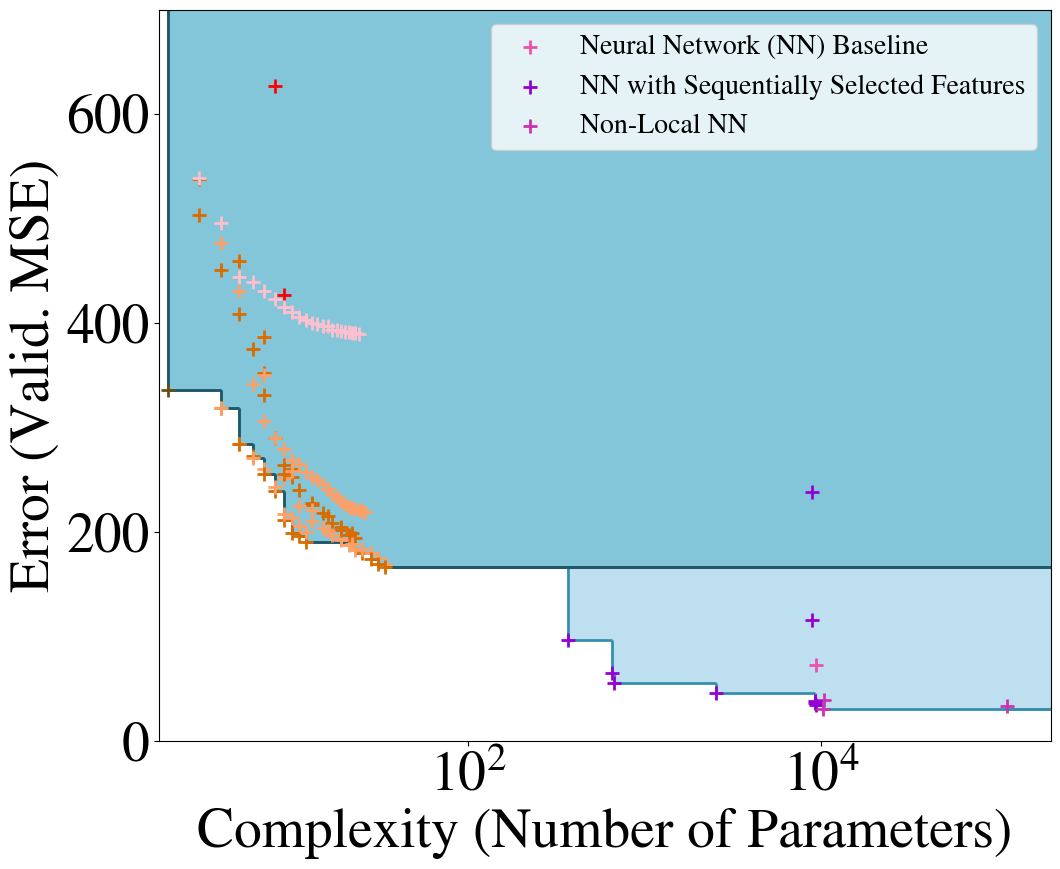

In [55]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], max(mse_scores2)], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), max(mse_scores2)], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], max(mse_scores2)], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in filtered_keys2:
    skip = 0
    if 'lin_cl_area' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'deg_1' in k: col = red_cmap(2); m='+'; cap = ''; skip = 0
    elif 'sq_grid_search' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'Sundqvist Baseline'; skip = 0
    elif 'wang_grid_search' in k: col = orange_cmap(4); m='+'; cap = 'Wang Baseline'; skip = 0
    elif 'pol_deg_2' in k: col = red_cmap(3); m='+'; cap = 'Quadratic'; skip = 0
    elif 'deg_2' in k: col = red_cmap(3); m='+'; cap = ''; skip = 0
    elif 'pol_deg_3' in k: col = orange_cmap(1); m='+'; cap = 'Cubic'; skip = 0
    elif 'deg_3' in k: col = orange_cmap(1); m='+'; skip = 0
    elif 'cell_NN' in k: col = pink_cmap(1); m='+'; cap = 'Neural Network (NN) Baseline'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = pink_cmap(5); m='+'; cap = 'NN with Sequentially Selected Features'; skip=0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 0
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
               dyamond22['MSE scores on validation set'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((0.25, 5.3))
ax.set_ylim((0, 699))

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Valid. MSE)')
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2)
# Change the order of the last three labels
# to "Sundqvist Baseline", "Neural Network (NN) Baseline", and "NN with Sequentially Selected Features"
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# new_labels = ['Linear', 'Quadratic', 'Cubic', 'Sundqvist Baseline', 'Wang Baseline', 
#               'Neural Network (NN) Baseline', 'NN with Sequentially Selected Features']
new_labels = ['Neural Network (NN) Baseline', 'NN with Sequentially Selected Features', 'Non-Local NN']
new_handles = [by_label[label] for label in new_labels]
# Change the color of the 'NN with Sequentially Selected Features' label to pink_cmap(5)
new_handles[1].set_color(pink_cmap(5))
plt.legend(new_handles, new_labels,fontsize=fz/2)

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 2 - Step 3

In [56]:
parameters3, mse_scores3, pareto_parameters3, pareto_mse_scores3, filtered_keys3 = \
    extract_pareto_data(dyamond22, key_substrings = [
        'lin_cl_area', 'deg_12', 'grid_search','sq','deg_2', 'deg_3',
        'NN',
        'pysr', 'gpgomea'])

In [57]:
for k in filtered_keys3:
    p = dyamond22['Complexity/Number of parameters'][k]
    mse = dyamond22['MSE scores on validation set'][k]
    print(f"{k}, Number of parameters={p}, MSE={mse}")

deg_3_no_reg_2_no_var_10, Number of parameters=12, MSE=190.78
seq_feat_sel_NN_6, Number of parameters=673, MSE=55.7913
deg_2_no_reg_3_no_var_6, Number of parameters=15, MSE=204.39
deg_3_no_reg_4_no_var_3, Number of parameters=13, MSE=227.57
sq_bfgs_regimes, Number of parameters=9, MSE=426.30260920433767
pol_deg_2_cl_area_8, Number of parameters=9, MSE=279.74
pol_deg_3_cl_area_9, Number of parameters=10, MSE=252.96
deg_2_no_reg_3_no_var_1, Number of parameters=5, MSE=458.96
pysr_EQC, Number of parameters=19, MSE=104.25850296714607
deg_3_no_reg_3_no_var_2, Number of parameters=7, MSE=351.68
lin_cl_area_5, Number of parameters=6, MSE=438.92
deg_3_no_reg_4_no_var_4, Number of parameters=16, MSE=215.02
pol_deg_2_cl_area_6, Number of parameters=7, MSE=306.19
deg_2_no_reg_3_no_var_3, Number of parameters=9, MSE=251.54
seq_feat_sel_NN_9, Number of parameters=9281, MSE=37.041
pol_deg_3_cl_area_8, Number of parameters=9, MSE=263.7
deg_3_no_reg_4_no_var_7, Number of parameters=25, MSE=180.05
deg_

In [58]:
key_grid = {k for k in filtered_keys3 if 'grid_search' in k}
for k in key_grid:
    print('Mse score for key '+k+' is '+str(dyamond22['MSE scores on validation set'][k]))

Mse score for key wang_grid_search is 336.007
Mse score for key teixeira_grid_search is 1373.496
Mse score for key sq_grid_search is 626.2913314498377


k= teixeira_grid_search


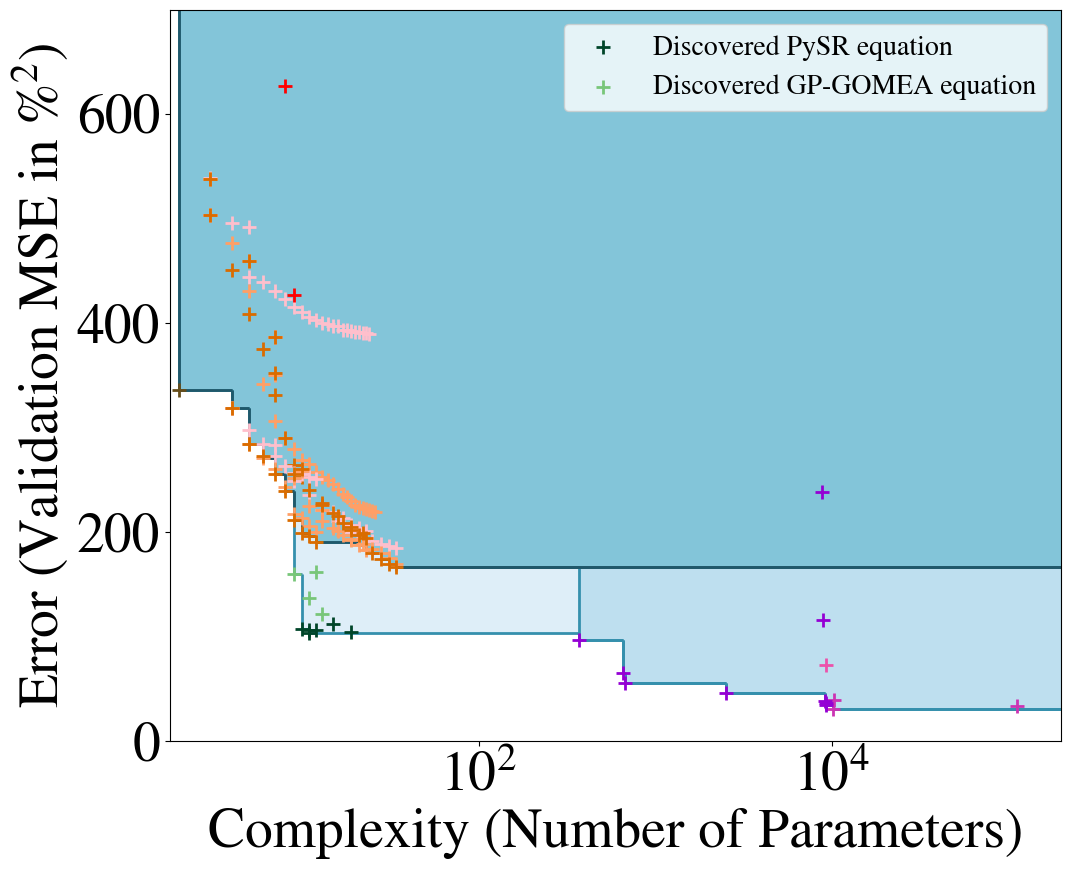

In [59]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 3)
for i in range(len(pareto_parameters3) - 1):
    ax.fill_betweenx([pareto_mse_scores3[i], max(mse_scores3)], 
                     pareto_parameters3[i], pareto_parameters3[i + 1], 
                     color=colors_fig1['pale_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores3), max(mse_scores3)], pareto_parameters3[-1], max(parameters3), 
                 color=colors_fig1['pale_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores3[0], max(mse_scores3)], min(parameters3), max(parameters3), 
                 color=colors_fig1['pale_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 3)
for i in range(len(pareto_parameters3)):
    if i > 0:
        ax.vlines(x=pareto_parameters3[i], ymin=pareto_mse_scores3[i-1], 
                  ymax=pareto_mse_scores3[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores3[i], xmin=pareto_parameters3[i], 
              xmax=pareto_parameters3[i+1] if i+1 < len(pareto_parameters3) else max(parameters3), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], max(mse_scores2)], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), max(mse_scores2)], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], max(mse_scores2)], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in dyamond22['Complexity/Number of parameters'].keys():
    if 'lin_cl_area' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'deg_1' in k: col = red_cmap(2); m='+'; cap = ''; skip = 0
    elif 'sq_grid_search' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'Sundqvist Baseline'; skip = 0
    elif 'wang_grid_search' in k: col = orange_cmap(4); m='+'; cap = 'Wang Baseline'; skip = 0
    elif 'pol_deg_2' in k: col = red_cmap(3); m='+'; cap = 'Quadratic'; skip = 0
    elif 'deg_2' in k: col = red_cmap(3); m='+'; cap = ''; skip = 0
    elif 'pol_deg_3' in k: col = orange_cmap(1); m='+'; cap = 'Cubic'; skip = 0
    elif 'deg_3' in k: col = orange_cmap(1); m='+'; skip = 0
    elif 'cell_NN' in k: col = pink_cmap(1); m='+'; cap = 'Neural Network (NN) Baseline'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = pink_cmap(5); m='+'; cap = 'NN with Sequentially Selected Features'; skip=0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 0
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
               dyamond22['MSE scores on validation set'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((0.25, 5.3))
ax.set_ylim((0, 699))

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Validation MSE in $\%^2$)')
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2)
# Only keep the labels containing "equation"
new_labels = [label for label in labels if 'equation' in label]
new_handles = [by_label[label] for label in new_labels]
# Make sure the 'Discovered GP-GOMEA equation' uses a 'deeppink' color
# and the 'Discovered PySR equation' uses a darkviolet color
new_handles[0].set_color(green_cmap(2))
new_handles[1].set_color(green_cmap(5))
plt.legend(new_handles, new_labels,fontsize=fz/2)
# Eliminate redundant labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_labels = ['Discovered PySR equation', 'Discovered GP-GOMEA equation']
new_handles = [by_label[label] for label in new_labels]
plt.legend(new_handles, new_labels,fontsize=fz/2)

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

## (May24) Ryan's new data

In [60]:
path_CSV = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/CSV_DATA/'
path_data = path_CSV+'pareto2024_summary_for_tom_final.csv'
path_data2 = path_CSV+'pareto2024_summary_June24.csv'

In [61]:
# open the csv file and display its data format
df = pd.read_csv(path_data2, delimiter=',')
df.head(n=200)

model_hyperparams   num_trainable_params  \
0                                    linear_regression                 426087   
1    dense_net/num-levels=1_num-neurons-per-layer=0064                 219905   
2    dense_net/num-levels=1_num-neurons-per-layer=0128                 439681   
3    dense_net/num-levels=1_num-neurons-per-layer=0256                 879233   
4    dense_net/num-levels=1_num-neurons-per-layer=0512                1758337   
..                                                 ...                    ...   
105  u_net_plusplus/num-levels=5_num-first-layer-ch...                1004390   
106  u_net_plusplus/num-levels=5_num-first-layer-ch...                3905628   
107  u_net_plusplus/num-levels=5_num-first-layer-ch...               15275623   
108  u_net_plusplus/num-levels=5_num-first-layer-ch...               60007238   
109                                              peter                  54786   

      overall_heating_rate_mse_k2_day02   simple_heating_rate_mse_k2_day02  \
0                              1.325499                           0.692107   
1                              0.770534                           0.351853   
2                              0.721871                           0.306659   
3                              0.615619                           0.304696   
4                              0.551181                           0.262589   
..                                  ...                                ...   
105                            0.121108                           0.121406   
106                            0.105821                           0.083070   
107                            0.045026                           0.037655   
108                            0.029296                           0.023316   
109                            0.044248                           0.031710   

      complex_heating_rate_mse_k2_day02  
0                              1.304038  
1                              1.060213  
2                              0.944118  
3                              0.848276  
4                              0.779084  
..                                  ...  
105                            0.134446  
106                            0.116804  
107                            0.069020  
108                            0.043709  
109                            0.092466  

[110 rows x 5 columns]

In [62]:
# In the model_hyperparams column, list the unique words before '_'
print(df['model_hyperparams'].str.split('_').str[0].unique())
print(df['model_hyperparams'].str.split('_').str[1].unique())
print(df['model_hyperparams'].str.split('_').str[2].unique())

['linear' 'dense' 'cnn/num-levels=1' 'cnn/num-levels=2' 'cnn/num-levels=3'
 'cnn/num-levels=4' 'cnn/num-levels=5' 'cnn/num-levels=6' 'u' 'peter']
['regression' 'net/num-levels=1' 'net/num-levels=2' 'net/num-levels=3'
 'net/num-levels=4' 'net/num-levels=5' 'net/num-levels=6'
 'num-first-layer-channels=02' 'num-first-layer-channels=04'
 'num-first-layer-channels=08' 'num-first-layer-channels=16'
 'num-first-layer-channels=32' 'num-first-layer-channels=64' 'net' nan]
[nan 'num-neurons-per-layer=0064' 'num-neurons-per-layer=0128'
 'num-neurons-per-layer=0256' 'num-neurons-per-layer=0512'
 'num-neurons-per-layer=1024' 'num-neurons-per-layer=2048'
 'num-first-layer-channels=02' 'num-first-layer-channels=04'
 'num-first-layer-channels=08' 'num-first-layer-channels=16'
 'num-first-layer-channels=32' 'num-first-layer-channels=64'
 'plusplus/num-levels=3' 'plusplus/num-levels=4' 'plusplus/num-levels=5']


In [63]:
key_y0 = ' simple_heating_rate_mse_k2_day02'
#key_y0 = ' complex_heating_rate_mse_k2_day02'

### Figure 3 - Step 1: ANN, CNN, and Linear model

In [64]:
key_substrings = ['linear','cnn','dense']
#key_substrings = ['linear','cnn','u_net_plusplus/','u_net/','dense']

In [65]:
# From each column of df, build a dictionary that uses the column model_hyperparams as keys
# and the column's values as values
# The dictionary is stored in a another dictionary that uses the column name as key

# Initialize the dictionary
data_dict = {}
# Iterate over the columns
for col in df.columns:
    # Initialize the dictionary for the current column
    data_dict[col] = {}
    # Iterate over the rows
    for i in range(len(df)):
        # Get the model hyperparameters
        key = df['model_hyperparams'][i]
        # Get the value of the current column
        value = df[col][i]
        # Store the value in the dictionary
        data_dict[col][key] = value

In [66]:
parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys = \
    extract_pareto_data(data_dict, key_substrings, 
                    original_dict=df['model_hyperparams'].unique(), 
                    new_point_1_mse_scores=40, new_point_2_parameters=8,
                    key_x = ' num_trainable_params', key_y = key_y0)	

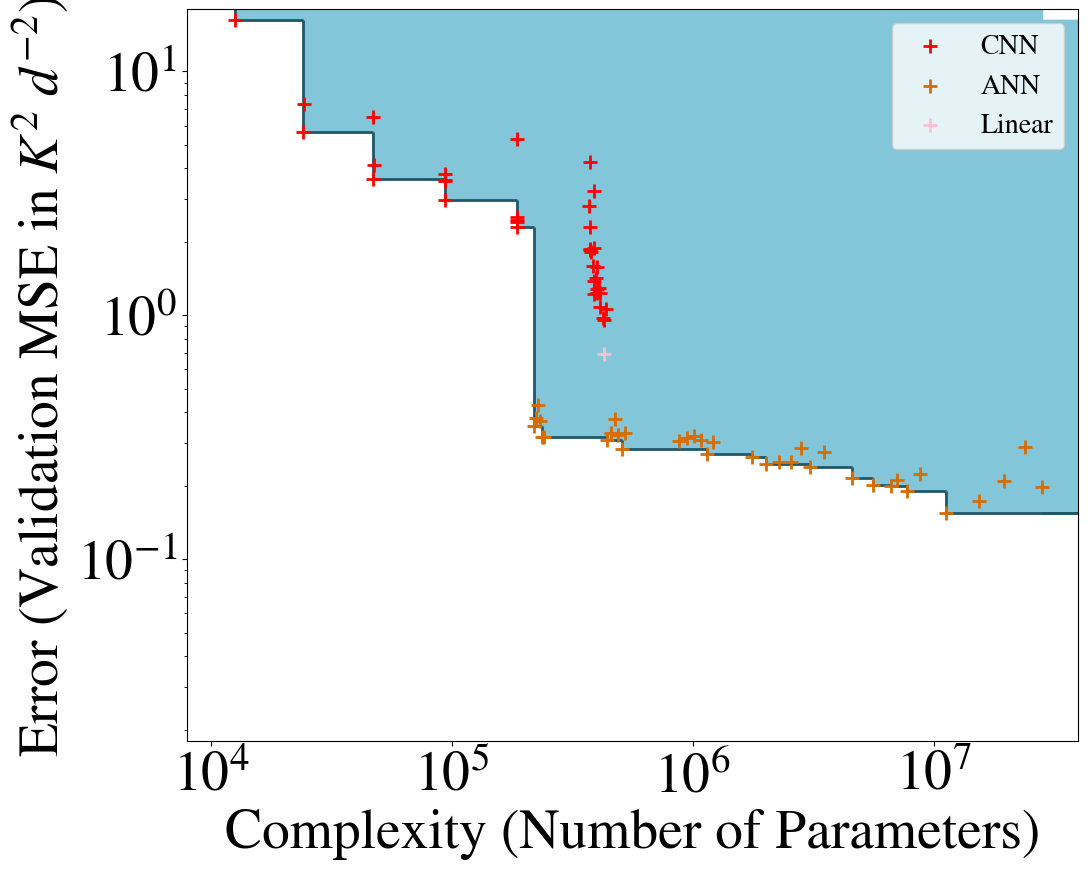

In [67]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in filtered_keys:
    skip = 0
    if 'linear' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'cnn' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'CNN'; skip = 0
    elif 'dense' in k: col = orange_cmap(1); m='+'; cap = 'ANN'; skip = 0
    elif 'cell_NN' in k: col = pink_cmap(1); m='+'; cap = 'Neural Network (NN) Baseline'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = pink_cmap(5); m='+'; cap = 'NN with Sequentially Selected Features'; skip=0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        print('k=',k)
        col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(data_dict[' num_trainable_params'][k]),
                   data_dict[key_y0][k],
                   s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((3.9, 7.6))
ax.set_ylim((0.018, 18))
# Make y axis log
ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Validation MSE in $K^2\ d^{-2}$)')

# For the legend, only keep three entries
# if 'linear' in k
# if 'cnn' in k
# if 'dense' in k
# and use cap as label
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 3 - Step 2: U-Net, U-Net ++


In [44]:
#key_substrings = ['linear','cnn','dense']
key_substrings = ['linear','cnn','dense','u_net_plusplus','u_net']

In [45]:
parameters2, mse_scores2, pareto_parameters2, pareto_mse_scores2, filtered_keys2 = \
    extract_pareto_data(data_dict, key_substrings, 
                    original_dict=df['model_hyperparams'].unique(), 
                    new_point_1_mse_scores=40, new_point_2_parameters=8,
                    key_x = ' num_trainable_params', key_y = key_y0)	

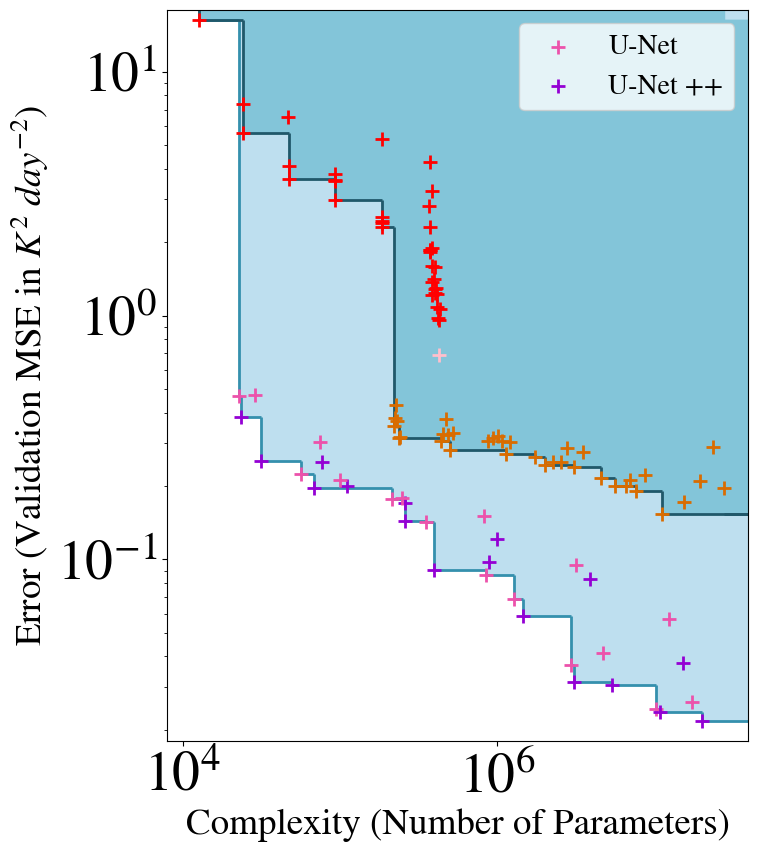

In [46]:
# Plot setup
# fig = plt.figure(figsize=(23/2, 19/2))
# fig = plt.figure(figsize=(35/2.5, 14/2.5))
fig = plt.figure(figsize=(15/2, 19/2))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], max(mse_scores2)], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), max(mse_scores2)], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], max(mse_scores2)], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in filtered_keys2:
    skip = 0
    if 'linear' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'cnn' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'CNN'; skip = 0
    elif 'dense' in k: col = orange_cmap(1); m='+'; cap = 'ANN'; skip = 0
    elif 'u_net_plusplus' in k: col = pink_cmap(5); m='+'; cap = 'U-Net ++'; skip=0
    elif 'u_net' in k: col = pink_cmap(1); m='+'; cap = 'U-Net'; skip = 0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        print('k=',k)
        col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(data_dict[' num_trainable_params'][k]),
                   data_dict[key_y0][k],
                   s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((3.9, 7.6))
ax.set_ylim((0.018, 18))
# Make y axis log
ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)',fontsize=2*fz/3)
plt.ylabel('Error (Validation MSE in $K^2\ day^{-2}$)',fontsize=2*fz/3)

if key_y0 == ' complex_heating_rate_mse_k2_day02':
    # Move y label to the right-hand side of the plot
    ax.yaxis.set_label_position("right")
    # Move the y tick labels to the right hand side of the plot
    ax.yaxis.tick_right()
else:
    plt.legend(loc='lower left')
    # Eliminate all redondant legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')
    # Only keep the labels containing 'U-Net' and 'U-Net ++'
    new_labels = ['U-Net', 'U-Net ++']
    new_handles = [by_label[label] for label in new_labels]
    # Change the color of the 'U-Net ++' label to pink_cmap(5)
    new_handles[1].set_color(pink_cmap(5))
    plt.legend(new_handles, new_labels,fontsize=fz/2, loc='upper right')


# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 3 - Step 3: Bi-directional LSTM/GRU

In [47]:
#key_substrings = ['linear','cnn','dense']
#key_substrings = ['linear','cnn','dense','u_net_plusplus','u_net']
key_substrings = ['linear','cnn','dense','u_net_plusplus','u_net','peter']

In [48]:
parameters3, mse_scores3, pareto_parameters3, pareto_mse_scores3, filtered_keys3 = \
    extract_pareto_data(data_dict, key_substrings, 
                    original_dict=df['model_hyperparams'].unique(), 
                    new_point_1_mse_scores=40, new_point_2_parameters=8,
                    key_x = ' num_trainable_params', key_y = key_y0)	

In [49]:
for k in filtered_keys3:
    p = data_dict[' num_trainable_params'][k]
    mse = data_dict[key_y0][k]
    if 'cnn' in k: print(k, mse)
    #print(f"{k}, Number of parameters={np.round(10*np.log10(p))/10} , {p}, {key_y0}={mse}\n")

cnn/num-levels=6_num-first-layer-channels=16 1.0814118385
cnn/num-levels=3_num-first-layer-channels=32 1.3766635656
cnn/num-levels=4_num-first-layer-channels=64 1.2956436872
cnn/num-levels=5_num-first-layer-channels=08 1.8851075172
cnn/num-levels=4_num-first-layer-channels=32 1.5845816135
cnn/num-levels=2_num-first-layer-channels=64 1.598580122
cnn/num-levels=1_num-first-layer-channels=16 3.5839562416
cnn/num-levels=3_num-first-layer-channels=08 2.3049340248
cnn/num-levels=6_num-first-layer-channels=02 4.2610692978
cnn/num-levels=6_num-first-layer-channels=08 1.2870771885
cnn/num-levels=4_num-first-layer-channels=02 3.7927806377
cnn/num-levels=1_num-first-layer-channels=08 4.1227149963
cnn/num-levels=5_num-first-layer-channels=02 5.3067688942
cnn/num-levels=3_num-first-layer-channels=16 1.8177193403
cnn/num-levels=4_num-first-layer-channels=08 1.8537915945
cnn/num-levels=3_num-first-layer-channels=02 6.5234470367
cnn/num-levels=1_num-first-layer-channels=02 16.2998218536
cnn/num-levels

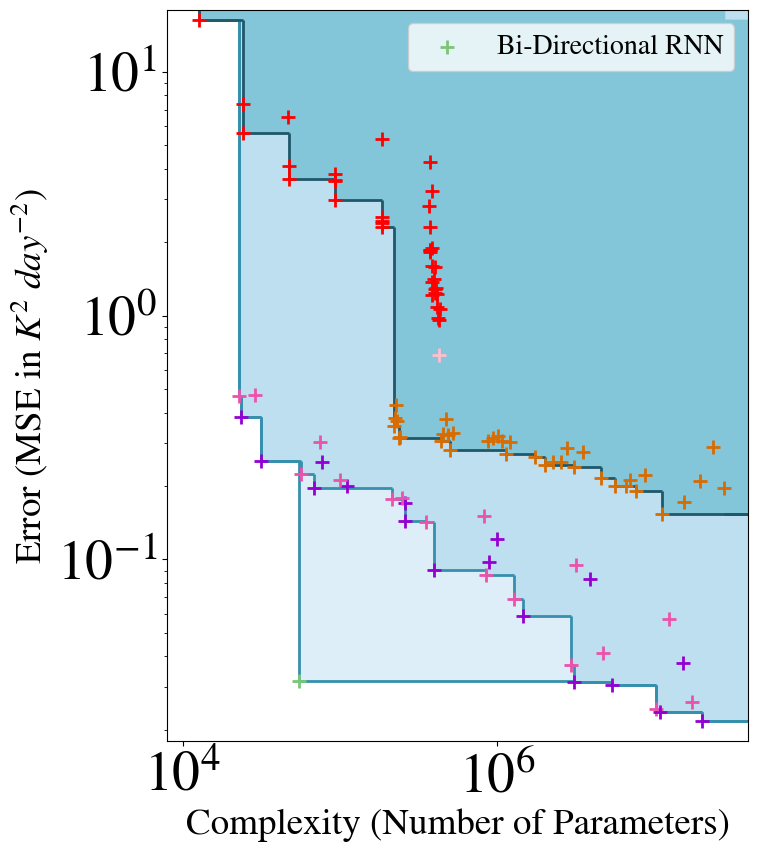

In [50]:
# Plot setup
# fig = plt.figure(figsize=(23/2, 19/2))
# fig = plt.figure(figsize=(35/2.5, 14/2.5))
fig = plt.figure(figsize=(15/2, 19/2))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 3)
for i in range(len(pareto_parameters3) - 1):
    ax.fill_betweenx([pareto_mse_scores3[i], max(mse_scores3)], 
                     pareto_parameters3[i], pareto_parameters3[i + 1], 
                     color=colors_fig1['pale_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores3), max(mse_scores3)], pareto_parameters3[-1], max(parameters3), 
                 color=colors_fig1['pale_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores3[0], max(mse_scores3)], min(parameters3), max(parameters3), 
                 color=colors_fig1['pale_blue'])

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], max(mse_scores2)], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), max(mse_scores2)], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], max(mse_scores2)], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)
    
# Draw the Pareto front with vertical and horizontal lines (Step 3)
for i in range(len(pareto_parameters3)):
    if i > 0:
        ax.vlines(x=pareto_parameters3[i], ymin=pareto_mse_scores3[i-1], 
                  ymax=pareto_mse_scores3[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores3[i], xmin=pareto_parameters3[i], 
              xmax=pareto_parameters3[i+1] if i+1 < len(pareto_parameters3) else max(parameters3), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in filtered_keys3:
    skip = 0
    if 'linear' in k: col = red_cmap(2); m='+'; cap = ''; skip = 0
    elif 'cnn' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = ''; skip = 0
    elif 'dense' in k: col = orange_cmap(1); m='+'; cap = ''; skip = 0
    elif 'u_net_plusplus' in k: col = pink_cmap(5); m='+'; cap = ''; skip=0
    elif 'u_net' in k: col = pink_cmap(1); m='+'; cap = ''; skip = 0
    elif 'peter' in k: col = green_cmap(2); m='+'; cap = 'Bi-Directional RNN'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(5); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        print('k=',k)
        col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(data_dict[' num_trainable_params'][k]),
                   data_dict[key_y0][k],
                   s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((3.9, 7.6))
ax.set_ylim((0.018, 18))
# Make y axis log
ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)',fontsize=2*fz/3)
plt.ylabel('Error (MSE in $K^2\ day^{-2}$)',fontsize=2*fz/3)

if key_y0 == ' complex_heating_rate_mse_k2_day02':
    # Move y label to the right-hand side of the plot
    ax.yaxis.set_label_position("right")
    # Move the y tick labels to the right hand side of the plot
    ax.yaxis.tick_right()
else:
    plt.legend(fontsize=fz/2, loc='upper right')


# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

## (May24) Sara's new data

In [83]:
path_folder = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/PKL_DATA/Sara_S_2024_05_data/'
# List all pkl files in that folder and open them

# List all .pkl files in the folder
pkl_files = [f for f in os.listdir(path_folder) if f.endswith('.pkl')]

# Function to open and load a pickle file
def load_pkl_file(file_path):
    with open(file_path, 'rb') as file:
        data = pkl.load(file)
    return data

# Dictionary to hold the data from each pkl file
pkl_data = {}

# Open each .pkl file and store its content in the dictionary
for pkl_file in pkl_files:
    full_path = os.path.join(path_folder, pkl_file)
    pkl_data[pkl_file] = load_pkl_file(full_path)

In [84]:
# Print the names of the loaded files and their corresponding data
for file_name, data in pkl_data.items():
    print(f"File: {file_name}")
    #print(f"Keys: {pkl_data.items()}")
    #print(f"Data: {data}\n")

File: timeseries_input_with_coarse_input_NN_prediction.pkl
File: timeseries_input_output.pkl
File: mse_complexity_v3.pkl
File: mse_complexity_new.pkl
File: timeseries_input.pkl
File: timeseries_input_with_prediction.pkl
File: mse_complexity.pkl


In [85]:
for item in pkl_data['timeseries_input_output.pkl'].items():
    tit,data = item
    print(tit, data.shape)

pw_lg (1000,)
Ts_lg (1000,)
T2m_lg (1000,)
q2m_lg (1000,)
precip_lg (1000, 1)
pw_hr (1000, 32, 32, 1)


In [86]:
for item in pkl_data['mse_complexity.pkl'].items():
    print(item)

('dense_1', {'MSE': 0.431, 'complexity': 594689, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_2', {'MSE': 0.49, 'complexity': 108801, 'R2': 0.57, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_3', {'MSE': 0.417, 'complexity': 45057, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_4', {'MSE': 0.424, 'complexity': 29889, 'R2': 0.45, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('org_2_enc_1', {'MSE': 0.14552, 'complexity': 612587, 'R2': 0.88, 'description': 'ANN + Encoder for  Spatial conectivity. ANN has the same number of parameter

In [87]:
for item in pkl_data['mse_complexity_new.pkl'].items():
    print(item)

('dense_1', {'MSE': 0.431, 'complexity': 594689, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_2', {'MSE': 0.49, 'complexity': 108801, 'R2': 0.57, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_3', {'MSE': 0.417, 'complexity': 45057, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_4', {'MSE': 0.424, 'complexity': 29889, 'R2': 0.45, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('org_2_enc_1', {'MSE': 0.14552, 'complexity': 612587, 'R2': 0.88, 'description': 'ANN + Encoder for  Spatial conectivity. ANN has the same number of parameter

In [88]:
for item in pkl_data['mse_complexity_v3.pkl'].items():
    print(item)

('dense_1', {'MSE': 0.431, 'complexity': 594689, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_2', {'MSE': 0.49, 'complexity': 108801, 'R2': 0.57, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_3', {'MSE': 0.417, 'complexity': 45057, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_4', {'MSE': 0.424, 'complexity': 29889, 'R2': 0.45, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('org_2_enc_1', {'MSE': 0.14552, 'complexity': 612587, 'R2': 0.88, 'description': 'ANN + Encoder for  Spatial conectivity. ANN has the same number of parameter

In [89]:
# Create a new data structure to store the model data
model_data = {}

# Iterate through the items in the provided data
for item in pkl_data['mse_complexity_v3.pkl'].items():
    model_name, characteristics = item
    for k, v in characteristics.items():
        # Initialize the sub-dictionary for key 'k' if it doesn't exist
        model_data.setdefault(k, {})
        # Initialize the sub-dictionary for model_name if it doesn't exist
        model_data[k].setdefault(model_name, {})
        # Add the value to the sub-dictionary
        model_data[k][model_name] = v

In [90]:
key_substrings = ['dense','org','temporal']

In [91]:
model_data.keys()

dict_keys(['MSE', 'complexity', 'R2', 'description', 'inputs', 'inputs-ANN', 'Input-Encoder', 'output', 'outputs'])

In [92]:
model_data['MSE'].keys()

dict_keys(['dense_1', 'dense_2', 'dense_3', 'dense_4', 'org_2_enc_1', 'org_2_enc_2', 'org_2_enc_RR', 'org_2_enc_decod_RR', 'org_2_enc_decod_RR_RI', 'temporal_2dt_30min', 'temporal_3dt_45min', 'temporal_CNN_3dt_45min', 'temporal_CNN_3dt_45min_v2', 'temporal_CNN_3dt_45min_v3', 'temporal_CNN_3dt_45min_v4'])

In [93]:
parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys = \
    extract_pareto_data(model_data, key_substrings, 
                    original_dict=model_data['MSE'].keys(), 
                    new_point_1_mse_scores=1, new_point_2_parameters=7,
                    key_x = 'complexity', key_y = 'MSE')	

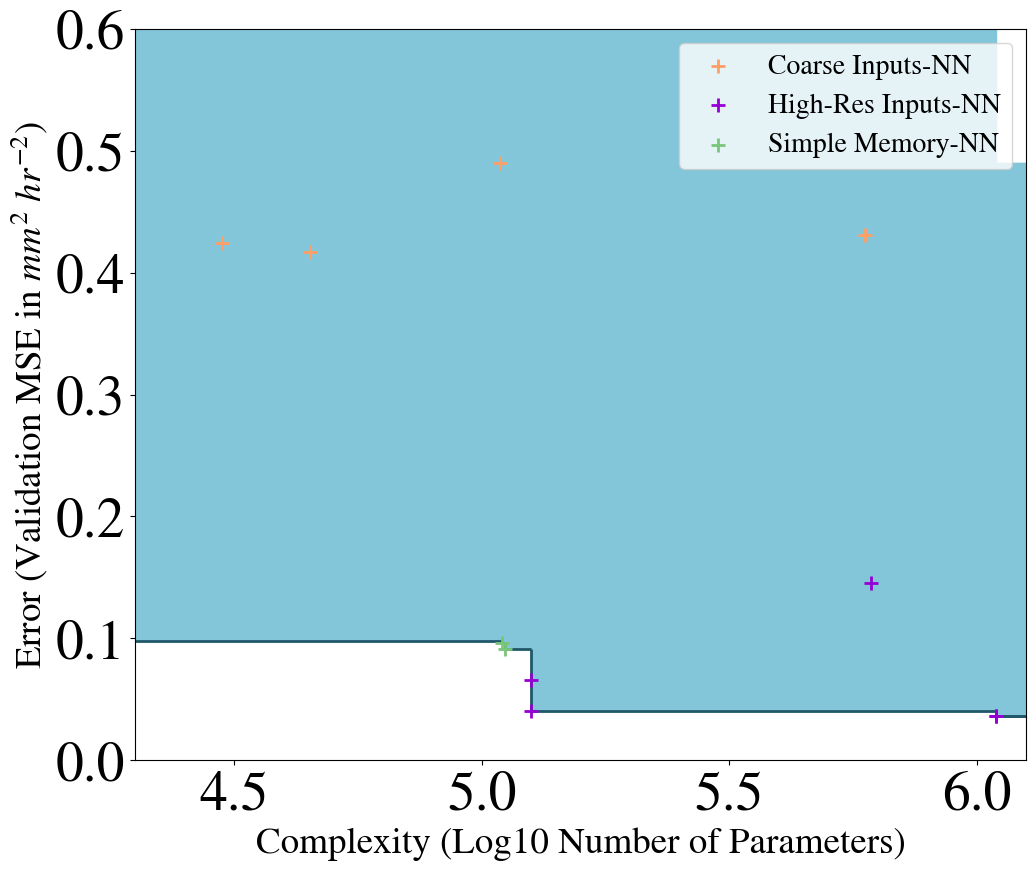

In [94]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in model_data['MSE'].keys():
    if 'dense' in k: col = red_cmap(3); m='+'; cap = 'Coarse Inputs-NN'; skip = 0
    elif 'org' in k: col = pink_cmap(5); m='+'; cap = 'High-Res Inputs-NN'; skip=0
    elif 'temporal' in k: col = green_cmap(2); m='+'; cap = 'Simple Memory-NN'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 0
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(model_data['complexity'][k]),
               model_data['MSE'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((4.3, 6.1))
ax.set_ylim((0,0.6))
# # Make y axis log
# ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Log10 Number of Parameters)', fontsize=2*fz/3)
plt.ylabel('Error (Validation MSE in $mm^2\ hr^{-2}$)', fontsize=2*fz/3)

# For the legend, only keep three entries
# if 'linear' in k
# if 'cnn' in k
# if 'dense' in k
# and use cap as label
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')

# Use scientific notation for x-ticks
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 4 - Step 1

In [95]:
parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys = \
    extract_pareto_data(model_data, key_substrings=['dense'], 
                    original_dict=model_data['MSE'].keys(), 
                    new_point_1_mse_scores=0.7, new_point_2_parameters=6.5,
                    key_x = 'complexity', key_y = 'MSE')	

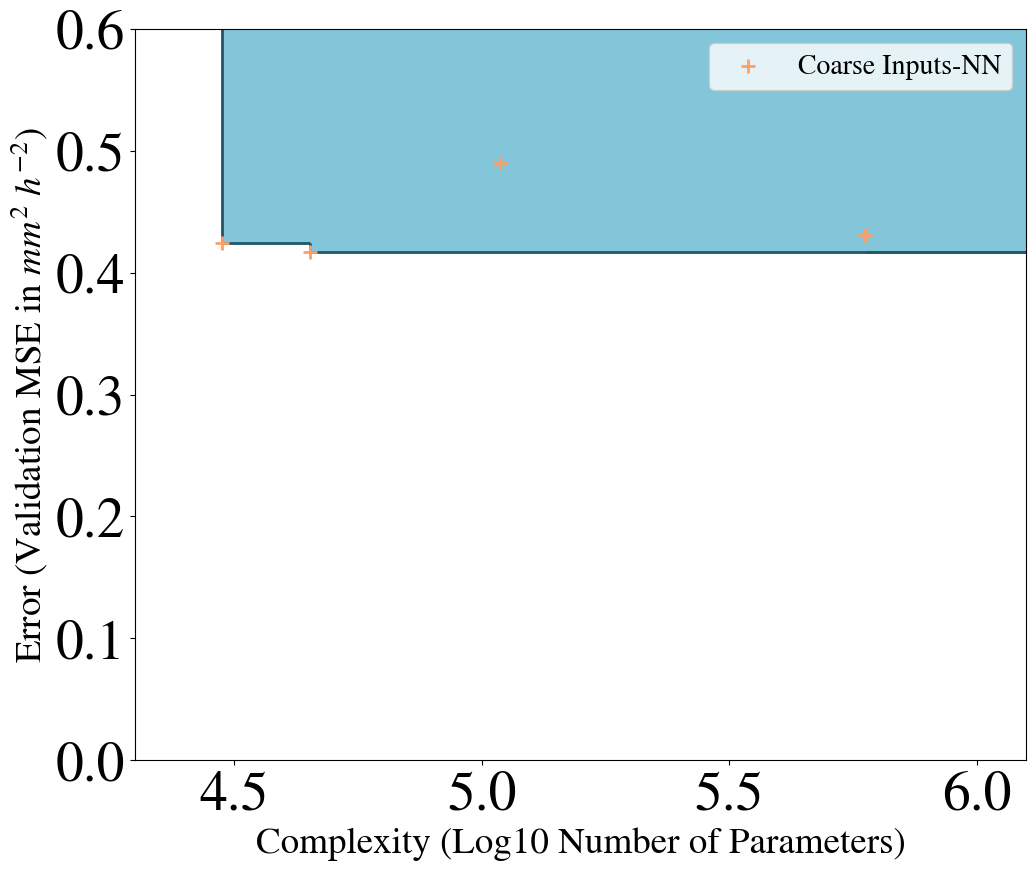

In [96]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], 0.7], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), 0.7], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], 0.7], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in model_data['MSE'].keys():
    if 'dense' in k: col = red_cmap(3); m='+'; cap = 'Coarse Inputs-NN'; skip = 0
    elif 'org' in k: col = pink_cmap(5); m='+'; cap = 'High-Res Inputs-NN'; skip=1
    elif 'temporal' in k: col = green_cmap(2); m='+'; cap = 'Simple Memory-NN'; skip = 1
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 1
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(model_data['complexity'][k]),
               model_data['MSE'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((4.3, 6.1))
ax.set_ylim((0,0.6))
# # Make y axis log
# ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Log10 Number of Parameters)', fontsize=2*fz/3)
plt.ylabel('Error (Validation MSE in $mm^2\ h^{-2}$)', fontsize=2*fz/3)

# For the legend, only keep three entries
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')

# Use scientific notation for x-ticks
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 4 - Step 2

In [97]:
parameters2, mse_scores2, pareto_parameters2, pareto_mse_scores2, filtered_keys2 = \
    extract_pareto_data(model_data, key_substrings=['dense','org'], 
                    original_dict=model_data['MSE'].keys(), 
                    new_point_1_mse_scores=0.7, new_point_2_parameters=6.5,
                    key_x = 'complexity', key_y = 'MSE')	

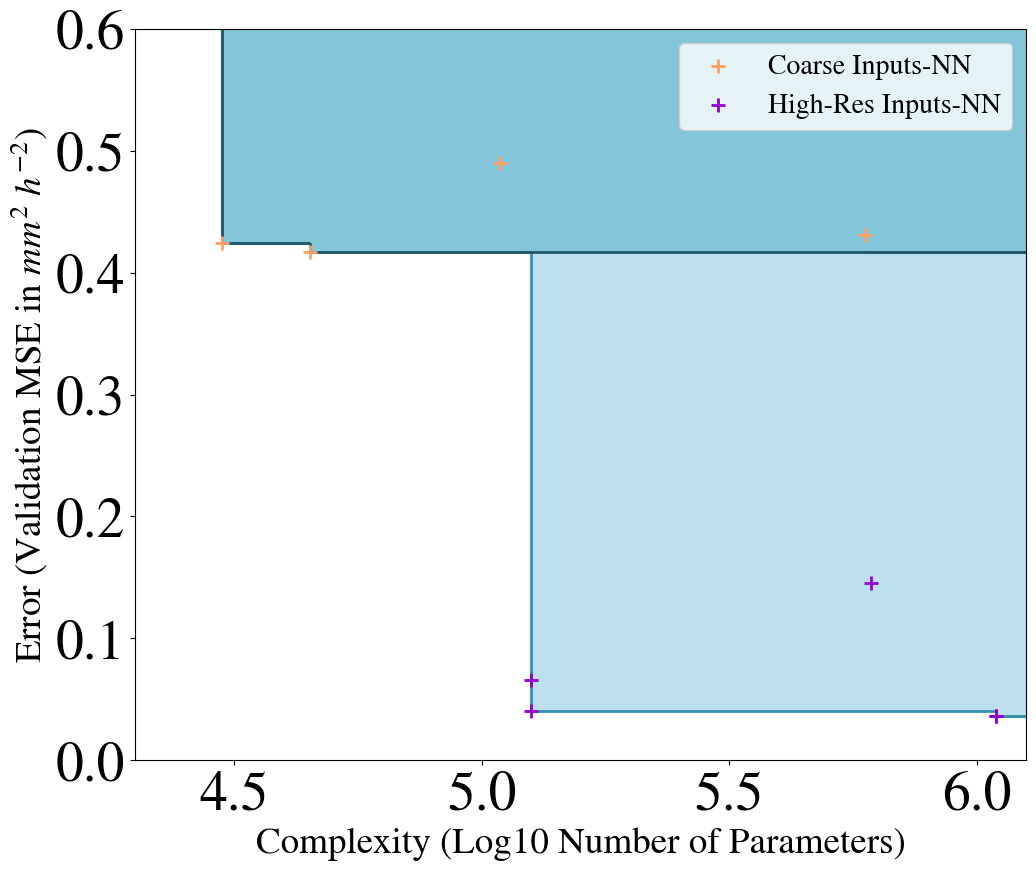

In [98]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], 0.7], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), 0.7], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], 0.7], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], 0.7], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), 0.7], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], 0.7], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in model_data['MSE'].keys():
    if 'dense' in k: col = red_cmap(3); m='+'; cap = 'Coarse Inputs-NN'; skip = 0
    elif 'org' in k: col = pink_cmap(5); m='+'; cap = 'High-Res Inputs-NN'; skip = 0
    elif 'temporal' in k: col = green_cmap(2); m='+'; cap = 'Simple Memory-NN'; skip = 1
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 1
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(model_data['complexity'][k]),
               model_data['MSE'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((4.3, 6.1))
ax.set_ylim((0,0.6))
# # Make y axis log
# ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Log10 Number of Parameters)', fontsize=2*fz/3)
plt.ylabel('Error (Validation MSE in $mm^2\ h^{-2}$)', fontsize=2*fz/3)

# For the legend, only keep three entries
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')

# Use scientific notation for x-ticks
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 4 - Step 3

In [99]:
parameters3, mse_scores3, pareto_parameters3, pareto_mse_scores3, filtered_keys3 = \
    extract_pareto_data(model_data, key_substrings=['dense','org','temporal'], 
                    original_dict=model_data['MSE'].keys(), 
                    new_point_1_mse_scores=0.7, new_point_2_parameters=6.5,
                    key_x = 'complexity', key_y = 'MSE')	

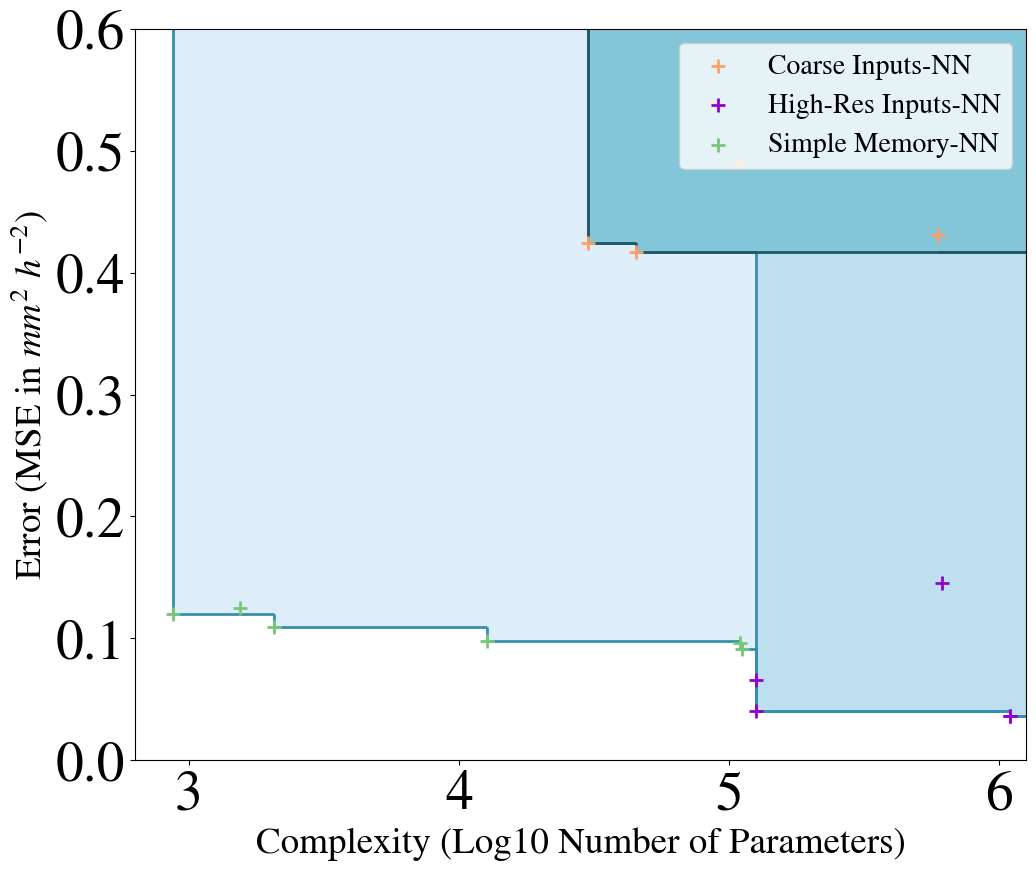

In [101]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 3)
for i in range(len(pareto_parameters3) - 1):
    ax.fill_betweenx([pareto_mse_scores3[i], max(mse_scores3)], 
                     pareto_parameters3[i], pareto_parameters3[i + 1], 
                     color=colors_fig1['pale_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores3), max(mse_scores3)], pareto_parameters3[-1], max(parameters3), 
                 color=colors_fig1['pale_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores3[0], max(mse_scores3)], min(parameters3), max(parameters3), 
                 color=colors_fig1['pale_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 3)
for i in range(len(pareto_parameters3)):
    if i > 0:
        ax.vlines(x=pareto_parameters3[i], ymin=pareto_mse_scores3[i-1], 
                  ymax=pareto_mse_scores3[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores3[i], xmin=pareto_parameters3[i], 
              xmax=pareto_parameters3[i+1] if i+1 < len(pareto_parameters3) else max(parameters3), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], 0.7], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), 0.7], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], 0.7], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], 0.7], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), 0.7], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], 0.7], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in model_data['MSE'].keys():
    if 'dense' in k: col = red_cmap(3); m='+'; cap = 'Coarse Inputs-NN'; skip = 0
    elif 'org' in k: col = pink_cmap(5); m='+'; cap = 'High-Res Inputs-NN'; skip = 0
    elif 'temporal' in k: col = green_cmap(2); m='+'; cap = 'Simple Memory-NN'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 1
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(model_data['complexity'][k]),
               model_data['MSE'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((2.8, 6.1))
ax.set_ylim((0,0.6))
# # Make y axis log
# ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Log10 Number of Parameters)', fontsize=2*fz/3)
plt.ylabel('Error (MSE in $mm^2\ h^{-2}$)', fontsize=2*fz/3)

# For the legend, only keep three entries
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')

# Use scientific notation for x-ticks
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Visualize time series (in pkl format)
<!-- File: timeseries_input.pkl
File: timeseries_input_with_prediction.pkl -->

In [73]:
print('timeseries_input.pkl')
for item in pkl_data['timeseries_input.pkl'].items():
    tit,data = item
    print(tit, data.shape)
print('\n')

print('timeseries_input_output.pkl')
for item in pkl_data['timeseries_input_output.pkl'].items():
    tit,data = item
    print(tit, data.shape)
print('\n')

print('timeseries_input_with_prediction.pkl')
for item in pkl_data['timeseries_input_with_prediction.pkl'].items():
    tit,data = item
    print(tit, data.shape)
print('\n')

print('timeseries_input_with_coarse_input_NN_prediction.pkl')
for item in pkl_data['timeseries_input_with_coarse_input_NN_prediction.pkl'].items():
    tit,data = item
    print(tit, data.shape)
print('\n')

timeseries_input.pkl
PW (1000,)
SST (1000,)
T2m (1000,)
qv2m (1000,)
SH (1000,)
LH (1000,)
precip_lg (1000, 1)
pw_anomaly (1000, 32, 32, 1)


timeseries_input_output.pkl
pw_lg (1000,)
Ts_lg (1000,)
T2m_lg (1000,)
q2m_lg (1000,)
precip_lg (1000, 1)
pw_hr (1000, 32, 32, 1)


timeseries_input_with_prediction.pkl
PW (1000,)
SST (1000,)
T2m (1000,)
qv2m (1000,)
SH (1000,)
LH (1000,)
precip_lg_predicted (1000, 1)
precip_lg (1000, 1)
pw_anomaly (1000, 32, 32, 1)


timeseries_input_with_coarse_input_NN_prediction.pkl
PW (1000,)
SST (1000,)
T2m (1000,)
qv2m (1000,)
SH (1000,)
LH (1000,)
precip_lg_predicted (1000, 1)
precip_lg (1000, 1)
pw_anomaly (1000, 32, 32, 1)
precip_lgpredict_coarse_input (1000, 1)




In [74]:
# Extract the data
timeseries_input = pkl_data['timeseries_input.pkl']
timeseries_input_output = pkl_data['timeseries_input_output.pkl']
timeseries_input_with_prediction = pkl_data['timeseries_input_with_prediction.pkl']
timeseries_input_with_coarse_prediction = pkl_data['timeseries_input_with_coarse_input_NN_prediction.pkl']

In [75]:
# Define time window
t_start = 500  # specify the start time index
t_end = 520  # specify the end time index

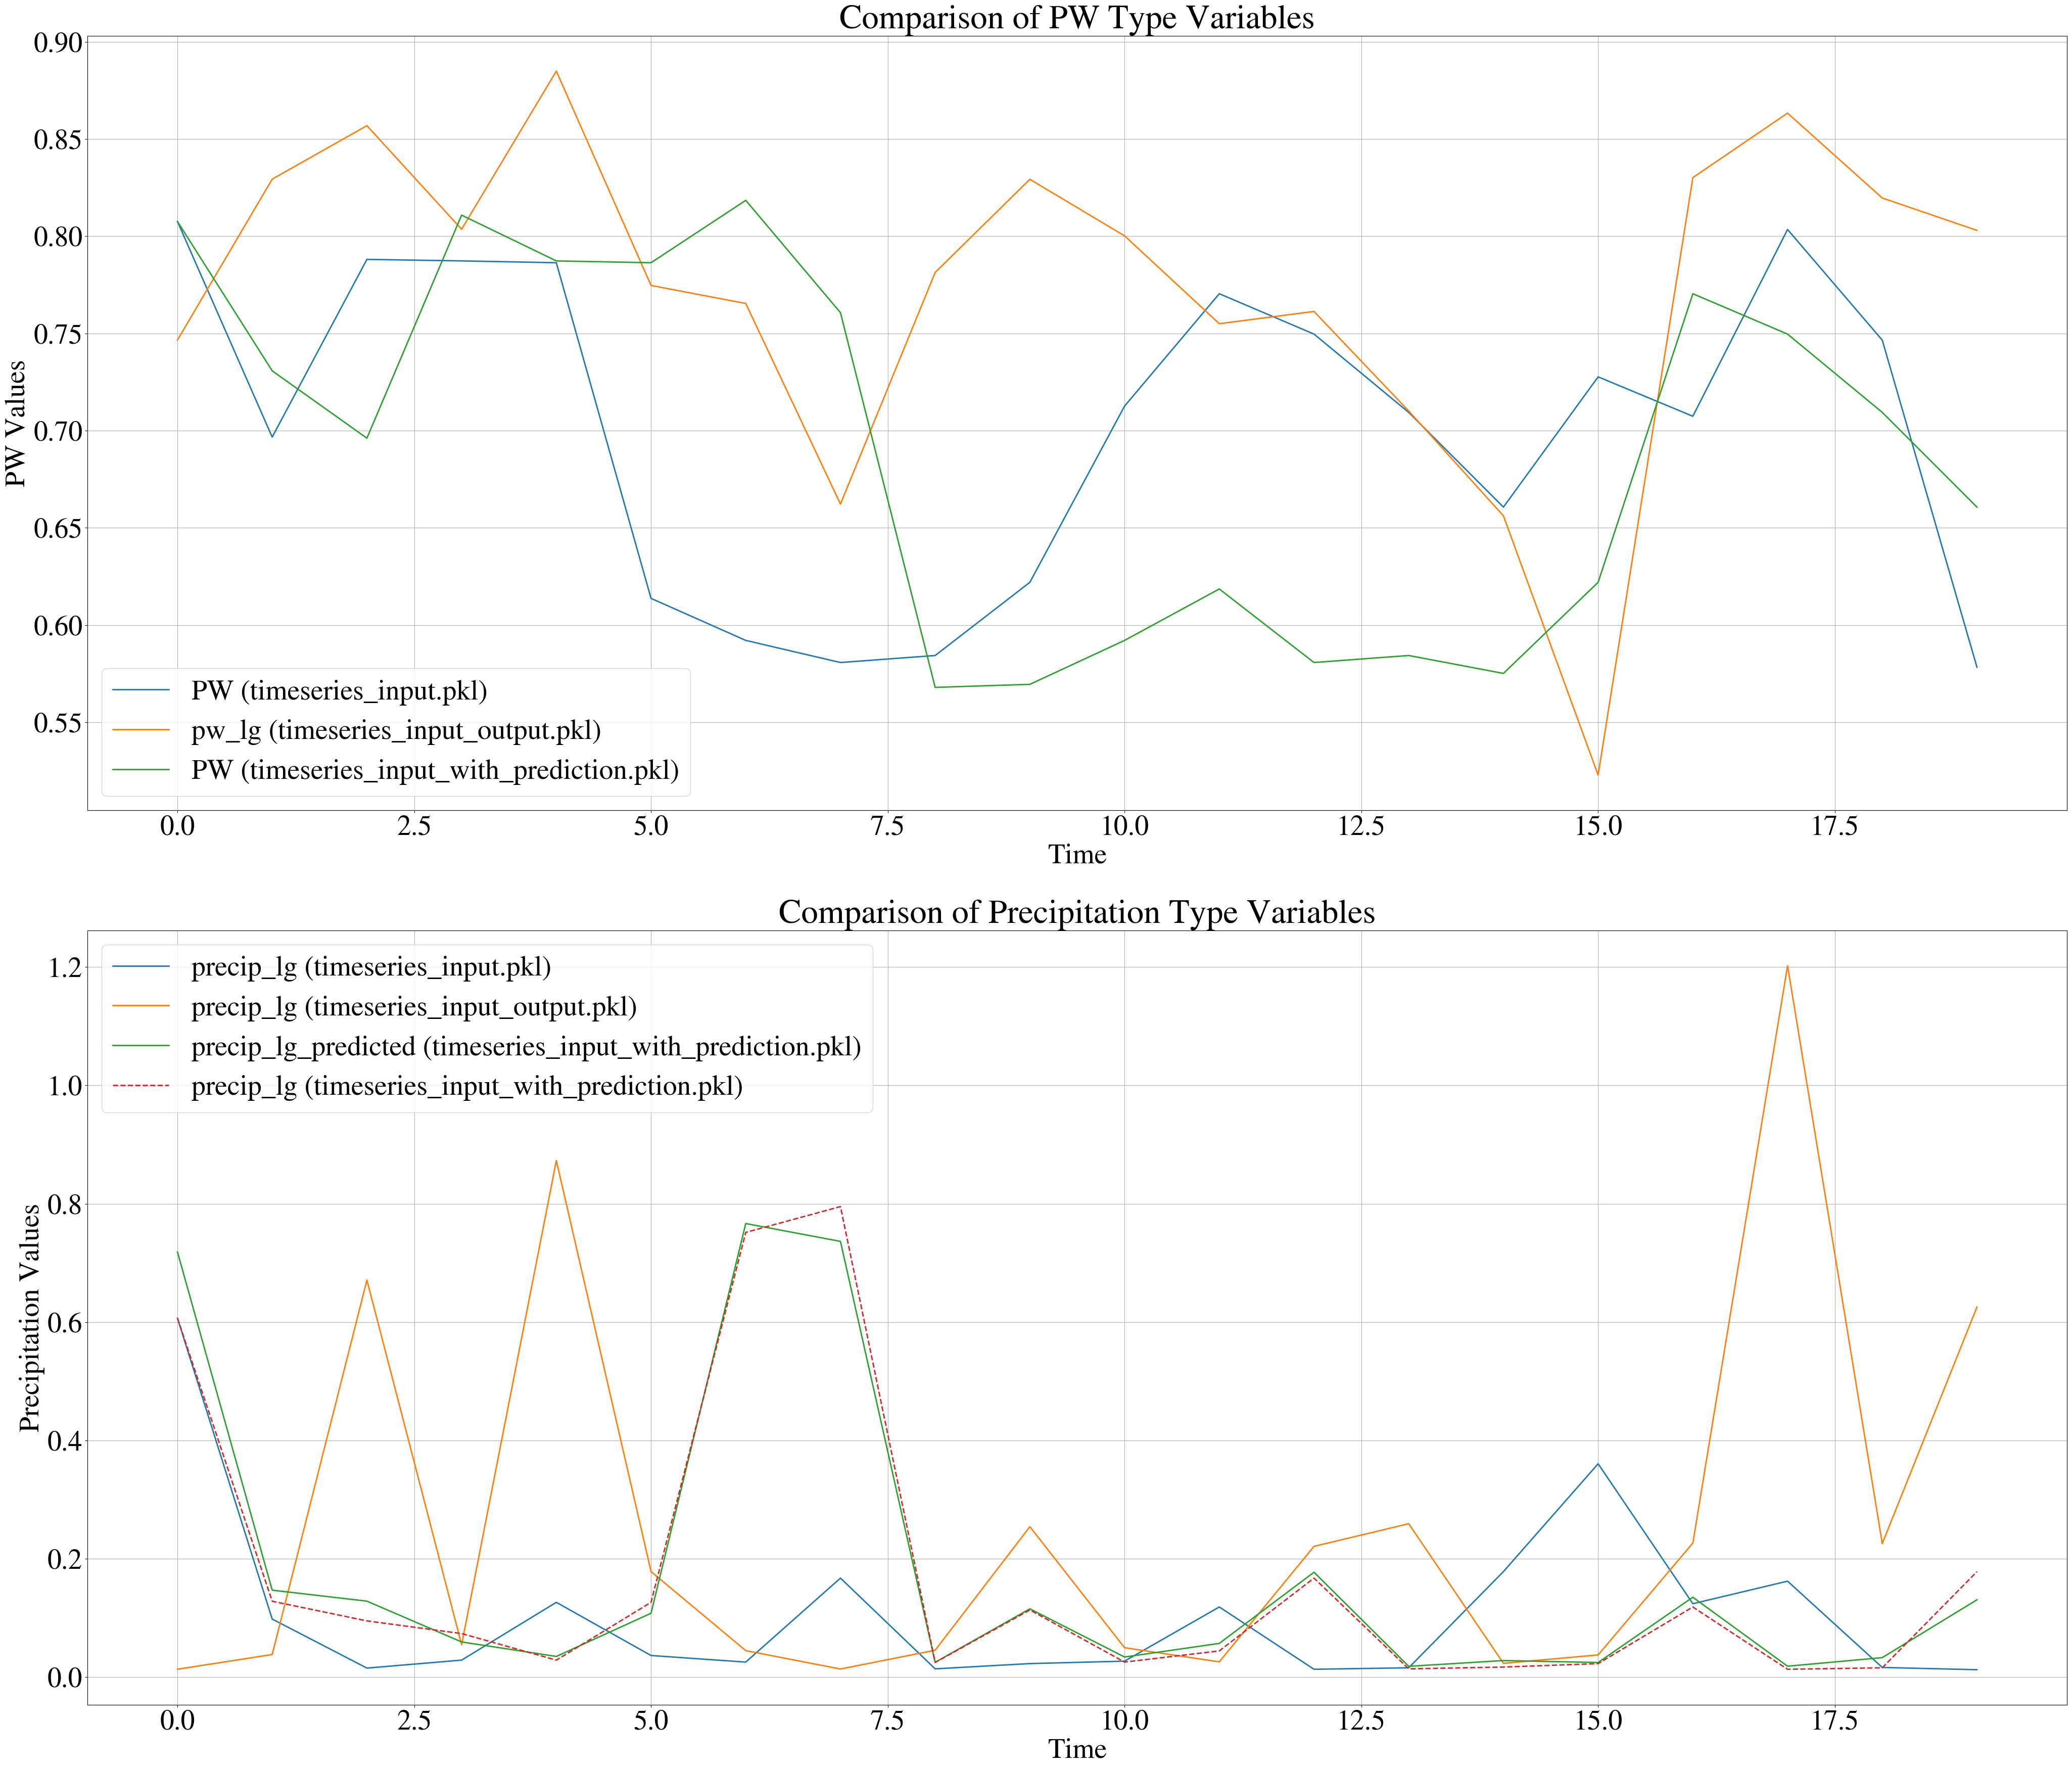

In [63]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14*3, 12*3))

# Plot PW type variables in the first subplot
axs[0].plot(timeseries_input['PW'][t_start:t_end], label='PW (timeseries_input.pkl)')
axs[0].plot(timeseries_input_output['pw_lg'][t_start:t_end], label='pw_lg (timeseries_input_output.pkl)')
axs[0].plot(timeseries_input_with_prediction['PW'][t_start:t_end], label='PW (timeseries_input_with_prediction.pkl)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('PW Values')
axs[0].set_title('Comparison of PW Type Variables')
axs[0].legend()
axs[0].grid(True)

# Plot precip type variables in the second subplot
axs[1].plot(timeseries_input['precip_lg'][t_start:t_end], label='precip_lg (timeseries_input.pkl)')
axs[1].plot(timeseries_input_output['precip_lg'][t_start:t_end], label='precip_lg (timeseries_input_output.pkl)')
axs[1].plot(timeseries_input_with_prediction['precip_lg_predicted'][t_start:t_end], label='precip_lg_predicted (timeseries_input_with_prediction.pkl)')
axs[1].plot(timeseries_input_with_prediction['precip_lg'][t_start:t_end], label='precip_lg (timeseries_input_with_prediction.pkl)', linestyle='--')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Precipitation Values')
axs[1].set_title('Comparison of Precipitation Type Variables')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
# timeseries_input_with_prediction.keys()
timeseries_input_with_coarse_prediction.keys()

dict_keys(['PW', 'SST', 'T2m', 'qv2m', 'SH', 'LH', 'precip_lg_predicted', 'precip_lg', 'pw_anomaly', 'precip_lgpredict_coarse_input'])

In [78]:
# PW = timeseries_input_with_prediction['PW']
# P_true = timeseries_input_with_prediction['precip_lg']
# P_pred = timeseries_input_with_prediction['precip_lg_predicted']

PW = timeseries_input_with_coarse_prediction['PW']
P_true = timeseries_input_with_coarse_prediction['precip_lg']
P_pred = timeseries_input_with_coarse_prediction['precip_lg_predicted']
P_coarsepred = timeseries_input_with_coarse_prediction['precip_lgpredict_coarse_input']

In [79]:
# Detect indices of 5 top largest variations for PW
PW_diff = np.abs(PW[1:] - PW[:-1])
PW_diff_sorted = np.argsort(PW_diff)[::-1]
PW_diff_sorted[:5]

array([ 65, 943, 692,  36, 922])

In [80]:
# Define the indices for plotting
it_middle = 67  # Index where the prediction starts
it_start = it_middle-10     # Starting index for the time series plot
it_end = it_middle+10    # Ending index for the time series plot

# Create a time array assuming evenly spaced timesteps of 45 minutes
t = np.linspace(0, (len(PW)-1)*45/60, len(PW))

/tmp/ipykernel_3154668/3622460891.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(empty_string_labels)


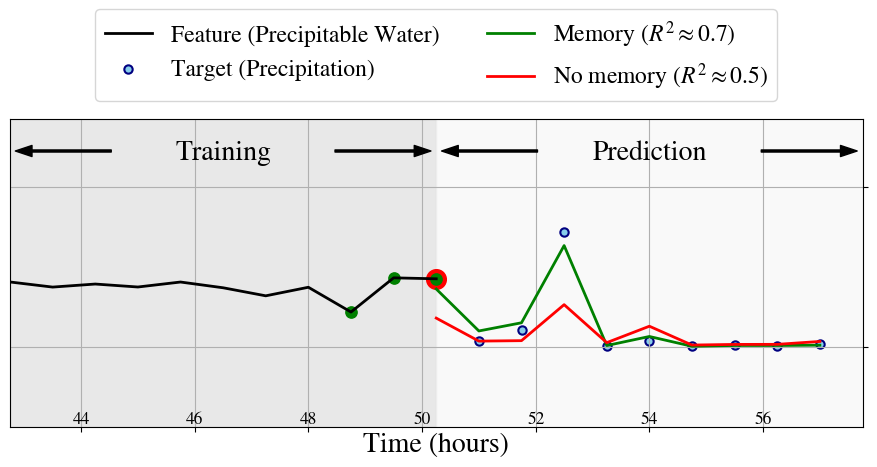

In [82]:
# Plotting
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)

# Apply different background colors for time before and after prediction (at it_middle)
ax.axvspan(t[it_start], t[it_middle], color='lightgrey', alpha=0.5)
ax.axvspan(t[it_middle], t[it_end], color='whitesmoke', alpha=0.5)

# Plot the predictor PW as a black line until the prediction time
plt.plot(t[it_start:(it_middle+1)], PW[it_start:(it_middle+1)], 'k-', 
         linewidth=2, label='Feature (Precipitable Water)')

# Scatter plot the observations (P_true)
plt.scatter(t[it_middle:it_end], P_true[it_middle:it_end], c='skyblue', edgecolors='navy', 
            linewidth=1.5, label='Target (Precipitation)')

# Optionally plot the predictions (P_pred) if specified
plot_predictions = True  # Set to False if you don't want to plot predictions
if plot_predictions:
    plt.plot(t[it_middle:it_end], P_pred[it_middle:it_end], 'g-', linewidth=2, label='Memory ($R^2\\approx0.7$)')

# Highlight the Baseline model prediction at the time of prediction using PW values
plt.scatter(t[it_middle], PW[it_middle], c='r', s=200, edgecolors='r')

# Highlight the improved model using 2-3 points back in time with PW values
improved_indices = range(it_middle-2, it_middle+1)
plt.scatter(t[improved_indices], PW[improved_indices], c='g', s=66, edgecolors='g')

plt.plot(t[it_middle:it_end], P_coarsepred[it_middle:it_end], 'r-', linewidth=2, label='No memory ($R^2\\approx0.5$)')

# Smoothed version of the green line (moving average with noise)
window_size = 3
smoothed = np.convolve(P_pred[it_middle:it_end].flatten(), np.ones(window_size)/window_size, mode='same')
noise = np.random.normal(0, 0.1, len(smoothed))
smoothed_with_noise = smoothed + noise

# plt.plot(t[it_middle:it_end], smoothed_with_noise, 'r-', linewidth=2, label='No memory ($R^2\\approx0.5$)')

plt.ylim((-1, 4.1-1.25))
plt.xlim(t[it_start], t[it_end])

Y_text = 3.6-1.25
# Titles with arrows
ax.text(t[(it_start+it_middle)//2], Y_text, 'Training', horizontalalignment='center', fontsize=20)
ax.text(t[(it_middle+it_end)//2], Y_text, 'Prediction', horizontalalignment='center', fontsize=20)

Y_arrow = 3.7-1.25
# Adjusted Arrows for "Training"
ax.annotate('', xy=(t[it_start], Y_arrow), xytext=(t[it_start] + (t[it_middle]-t[it_start])/4, Y_arrow),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
ax.annotate('', xy=(t[it_middle], Y_arrow), xytext=(t[it_middle] - (t[it_middle]-t[it_start])/4, Y_arrow),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))

# Adjusted Arrows for "Prediction"
ax.annotate('', xy=(t[it_middle], Y_arrow), xytext=(t[it_middle] + (t[it_end]-t[it_middle])/4, Y_arrow),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
ax.annotate('', xy=(t[it_end], Y_arrow), xytext=(t[it_end] - (t[it_end]-t[it_middle])/4, Y_arrow),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))

plt.xlabel(r'Time (hours)', fontsize=20, labelpad=0) # Labelpad = -35 to put label inside the plot

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

leg0 = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), fontsize=17, ncol=2)
plt.grid(True)

# y
labels = [item.get_text() for item in ax.get_yticklabels()]
empty_string_labels = [''] * len(labels)
ax.set_yticklabels(empty_string_labels)

# Set xtick labels smaller and inside the plot
ax.tick_params(axis='x', labelsize=12.5, pad=-15)

plt.draw()

# Find the legend text you want to change. Assuming 'Baseline Predictions' is unique,
# this will change its color.
for text in leg0.get_texts():
    if 'Model Predictions' in text.get_text():
        text.set_color((0.33, 0.42, 0.18))  # Dark olive green RGB
    elif 'Baseline Prediction' in text.get_text():
        text.set_color((1.0, 0.2, 0.0))  # Orange RGB
    elif 'Improved Model Prediction' in text.get_text():
        text.set_color((0.0, 0.5, 0.0))  # Dark green RGB
    elif 'Baseline Predictions' in text.get_text():
        text.set_color((1.0, 0.2, 0.0))  # Red RGB

plt.show()

### Visualize spatial data (in nc format)

In [65]:
def list_and_open_files(path_folder):
    # List all files in the specified directory with .nc extension
    files = [f for f in os.listdir(path_folder) if os.path.isfile(os.path.join(path_folder, f)) and f.endswith('.nc')]
    
    # Open each .nc file with xarray and store the datasets in a list
    datasets = []
    for file in files:
        file_path = os.path.join(path_folder, file)
        try:
            ds = xr.open_dataset(file_path)
            datasets.append(ds)
            print(f"Opened file: {file}")
        except Exception as e:
            print(f"Failed to open file: {file}, error: {e}")
    
    return datasets

In [66]:
# List all nc files in the folder in path_folder and open them with xarray
datasets = list_and_open_files(path_folder)

Opened file: precip.nc
Opened file: pw.nc


In [68]:
# Create a custom colormap from white to blue
white_to_blue = LinearSegmentedColormap.from_list('white_to_blue', ['white', 'blue'])
# Get the reversed viridis colormap
reversed_viridis = plt.cm.viridis.reversed()

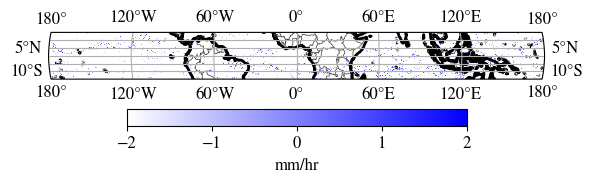

In [69]:
ds0 = datasets[0]
fz = 12
vmin = None
vmax = None

for var in ds0.data_vars:
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
    
    # # Apply log scale (log(x + eps)) to the data
    data = np.log10(ds0[var] + 1e-2)
    # Plot the data with the custom colormap
    data_plot = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=white_to_blue, 
                          vmin=vmin, vmax=vmax, add_colorbar=False)
    
    # Add horizontal colorbar below the plot
    cbar = plt.colorbar(data_plot, ax=ax, orientation='horizontal', fraction=0.046, pad=0.08)
    cbar.ax.tick_params(labelsize=fz)
    cbar.set_label('mm/hr', fontsize=fz)
    
    # Add coastlines and borders
    ax.coastlines(linewidth=2.0, edgecolor='0.25')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='0.25')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True)
    gl.xlabel_style = {'size': fz}
    gl.ylabel_style = {'size': fz}
    
    # Set title
    #ax.set_title(var, loc='left', pad=-0.1, fontsize=fz)
    
    # Show plot
    plt.show()

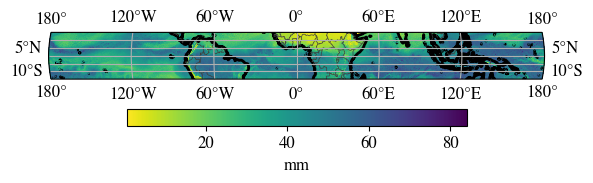

In [70]:
ds1 = datasets[1]
fz = 12
vmin = None
vmax = None

for var in ds1.data_vars:
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
    
    # Plot the data with the viridis colormap
    data_plot = ds1[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reversed_viridis, 
                              vmin=vmin, vmax=vmax, add_colorbar=False, add_labels=False)
    # Add horizontal colorbar below the plot
    cbar = plt.colorbar(data_plot, ax=ax, orientation='horizontal', fraction=0.046, pad=0.08)
    cbar.ax.tick_params(labelsize=fz)
    cbar.set_label('mm', fontsize=fz)
    
    # Add coastlines and borders
    ax.coastlines(linewidth=2.0, edgecolor='0.25')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='0.25')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True)
    gl.xlabel_style = {'size': fz}
    gl.ylabel_style = {'size': fz}
    
    # Set title
    #ax.set_title(var, loc='left', pad=-0.1, fontsize=fz)
    
    # Show plot
    plt.show()

In [97]:
lon0 = -90 + 360
lon1 = -70 + 360
lat0 = -10
lat1 = 10

vmin0 = 0
vmax0 = 70

/tmp/ipykernel_3748553/4154699728.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  white_to_blue = plt.cm.get_cmap('Blues')  # Assuming this is the custom colormap


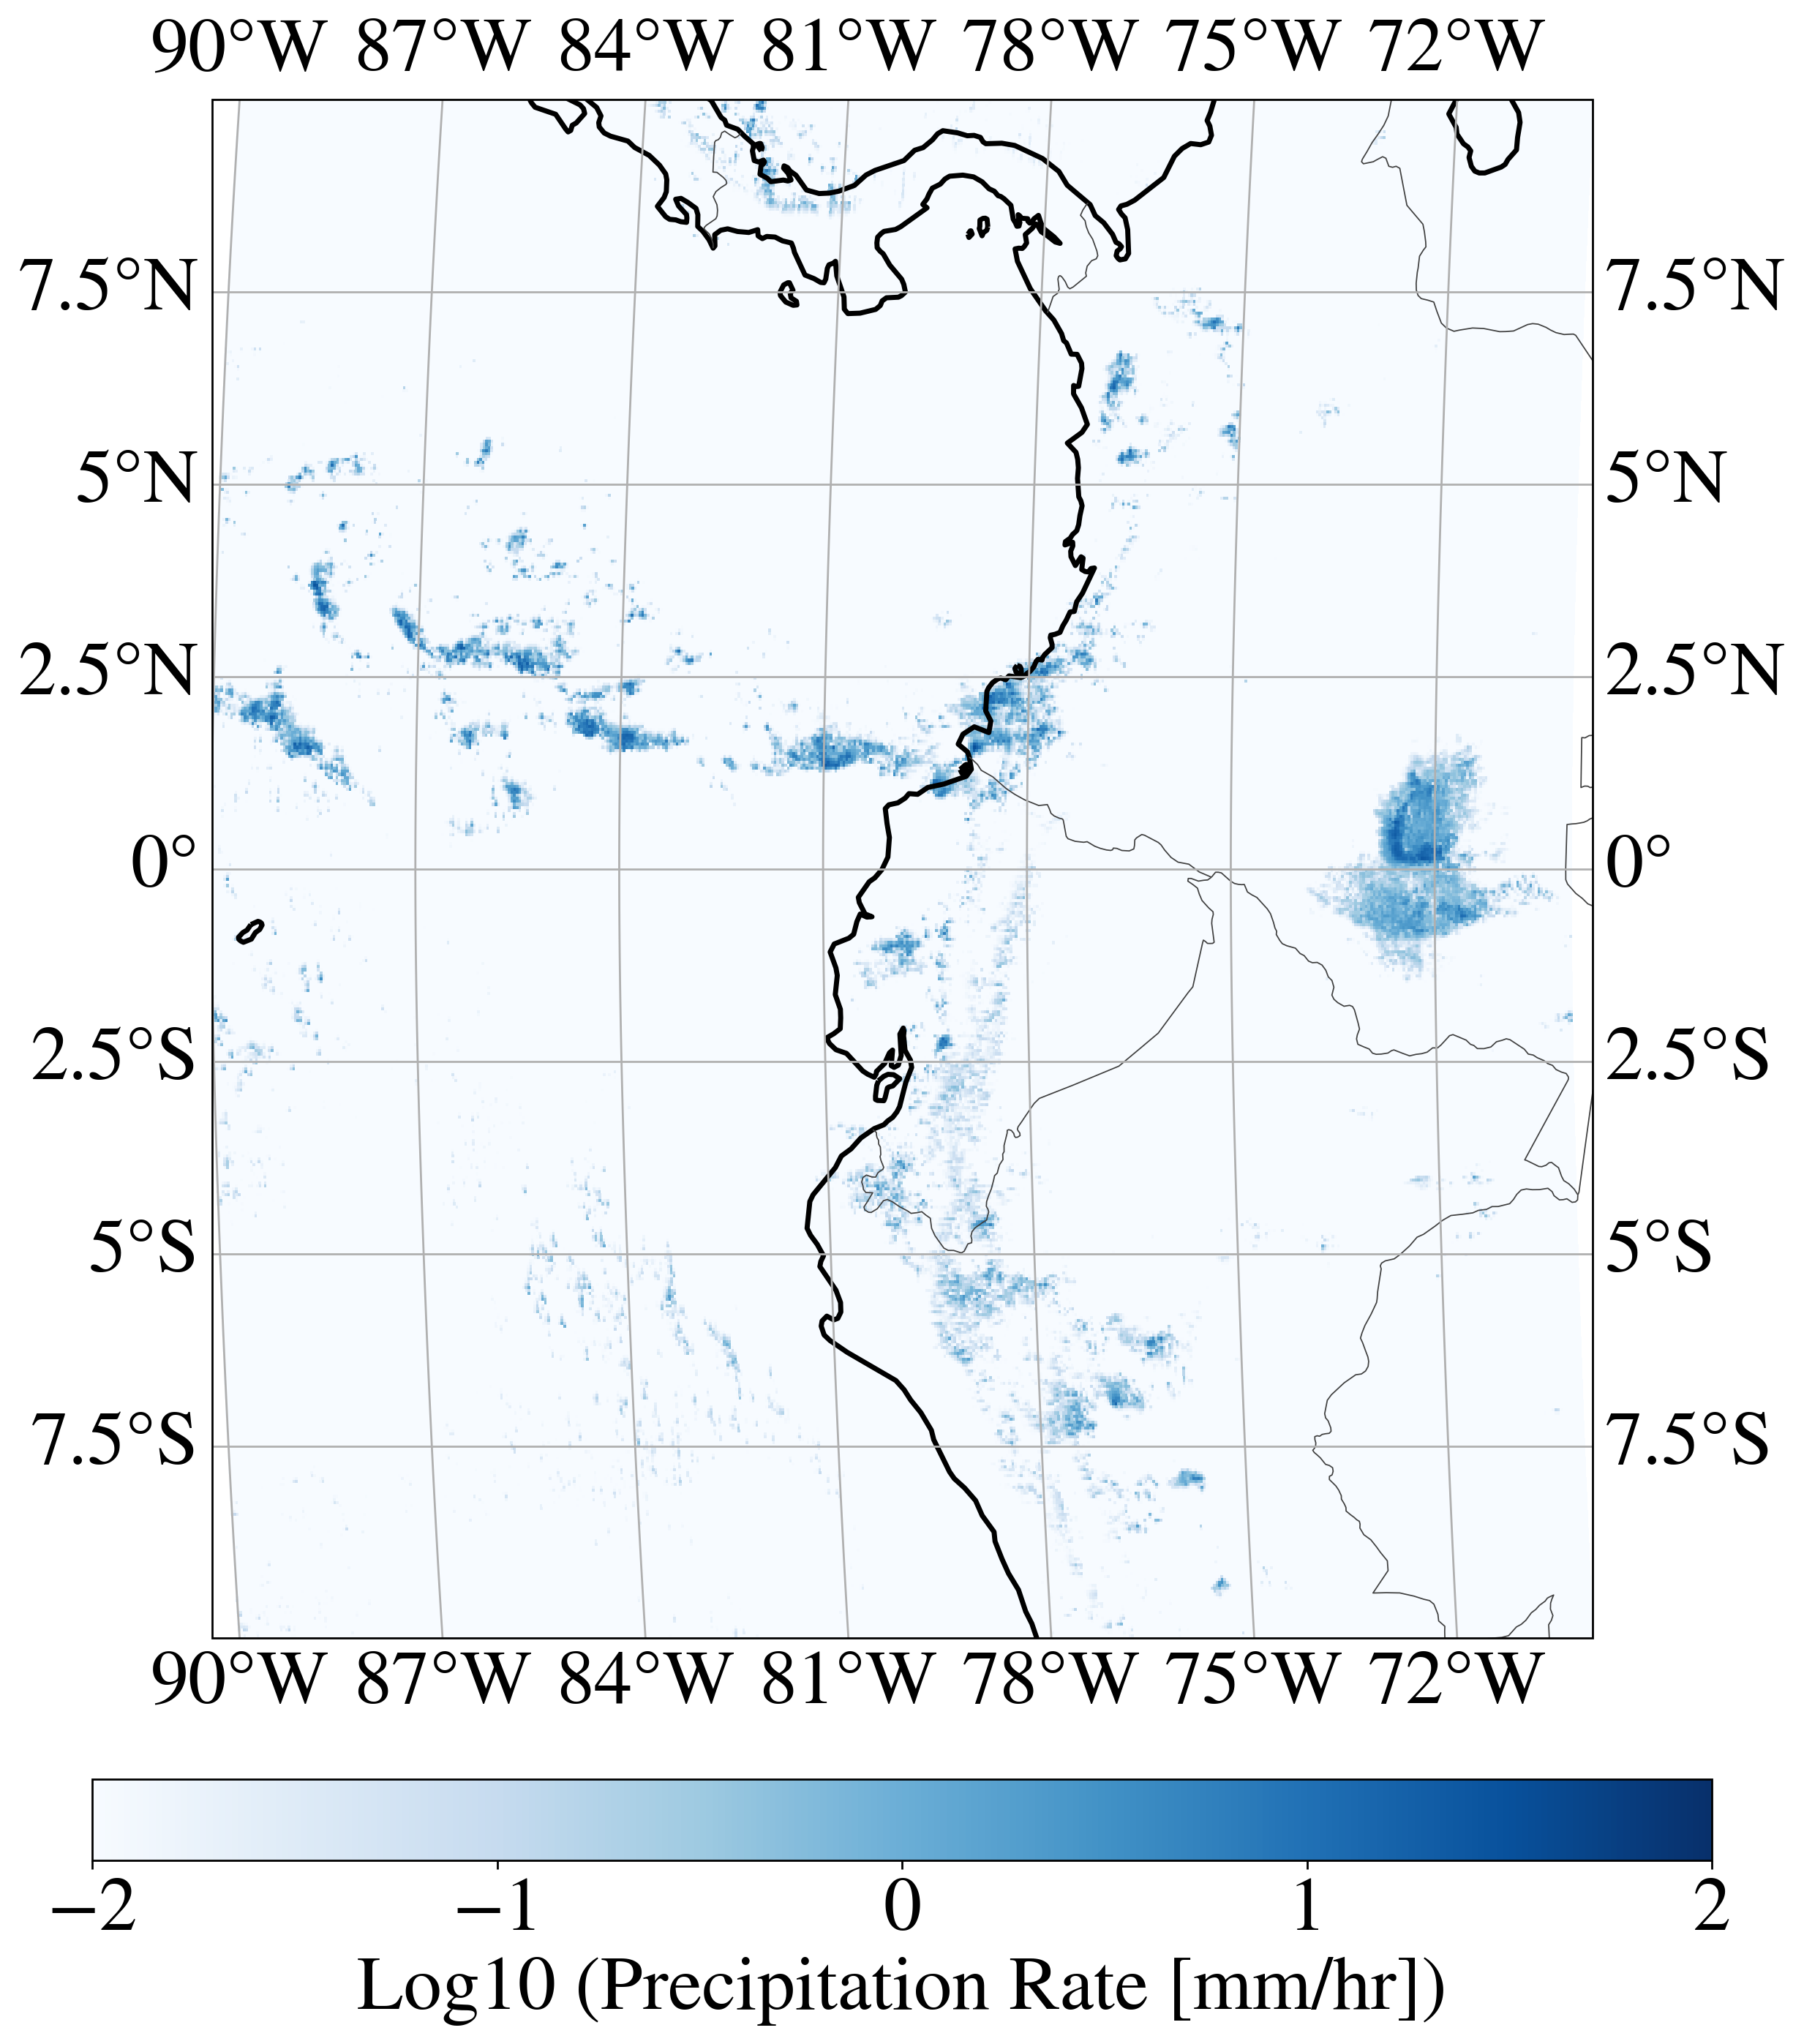

In [102]:
# Assuming datasets is a list of xarray datasets
ds0 = datasets[0]
fz = 12
vmin = None
vmax = None

# Define the region to zoom into (e.g., specific lat/lon bounds)
zoom_extent = {
    'lon_min': lon0,
    'lon_max': lon1,
    'lat_min': lat0,
    'lat_max': lat1
}

increase_factor = 2.5  # Factor to increase the figsize, fz, and DPI

fz = 12 * increase_factor  # Font size
white_to_blue = plt.cm.get_cmap('Blues')  # Assuming this is the custom colormap

for var in ds0.data_vars:
    # Subset the data using the specified extent
    data_subset = ds0[var].sel(
        lon=slice(zoom_extent['lon_min'], zoom_extent['lon_max']),
        lat=slice(zoom_extent['lat_min'], zoom_extent['lat_max'])
    )
    
    fig, ax = plt.subplots(figsize=(10 * increase_factor, 5 * increase_factor), 
                           subplot_kw={'projection': ccrs.Robinson()}, dpi=100 * increase_factor)
    
    # Apply log scale (log(x + eps)) to the data
    data = np.log10(data_subset + 1e-2)
    
    # Plot the data with the custom colormap
    data_plot = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=white_to_blue, 
                          vmin=vmin, vmax=vmax, add_colorbar=False)
    
    # Add horizontal colorbar below the plot
    cbar = plt.colorbar(data_plot, ax=ax, orientation='horizontal', fraction=0.046, pad=0.08)
    cbar.ax.tick_params(labelsize=fz)
    cbar.set_label('Log10 (Precipitation Rate [mm/hr])', fontsize=fz)
    
    # Add coastlines and borders
    ax.coastlines(linewidth=2.0, edgecolor='0.25')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='0.25')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True)
    gl.xlabel_style = {'size': fz}
    gl.ylabel_style = {'size': fz}
    
    # Set the extent to match the zoomed region
    ax.set_extent([zoom_extent['lon_min'], zoom_extent['lon_max'], 
                   zoom_extent['lat_min'], zoom_extent['lat_max']], 
                   crs=ccrs.PlateCarree())
    
    # Set title
    #ax.set_title(var, loc='left', pad=-0.1, fontsize=fz)
    
    # Show plot
    plt.show()

/tmp/ipykernel_3748553/3305736538.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reversed_viridis = plt.cm.get_cmap('viridis_r')  # Reversed viridis colormap


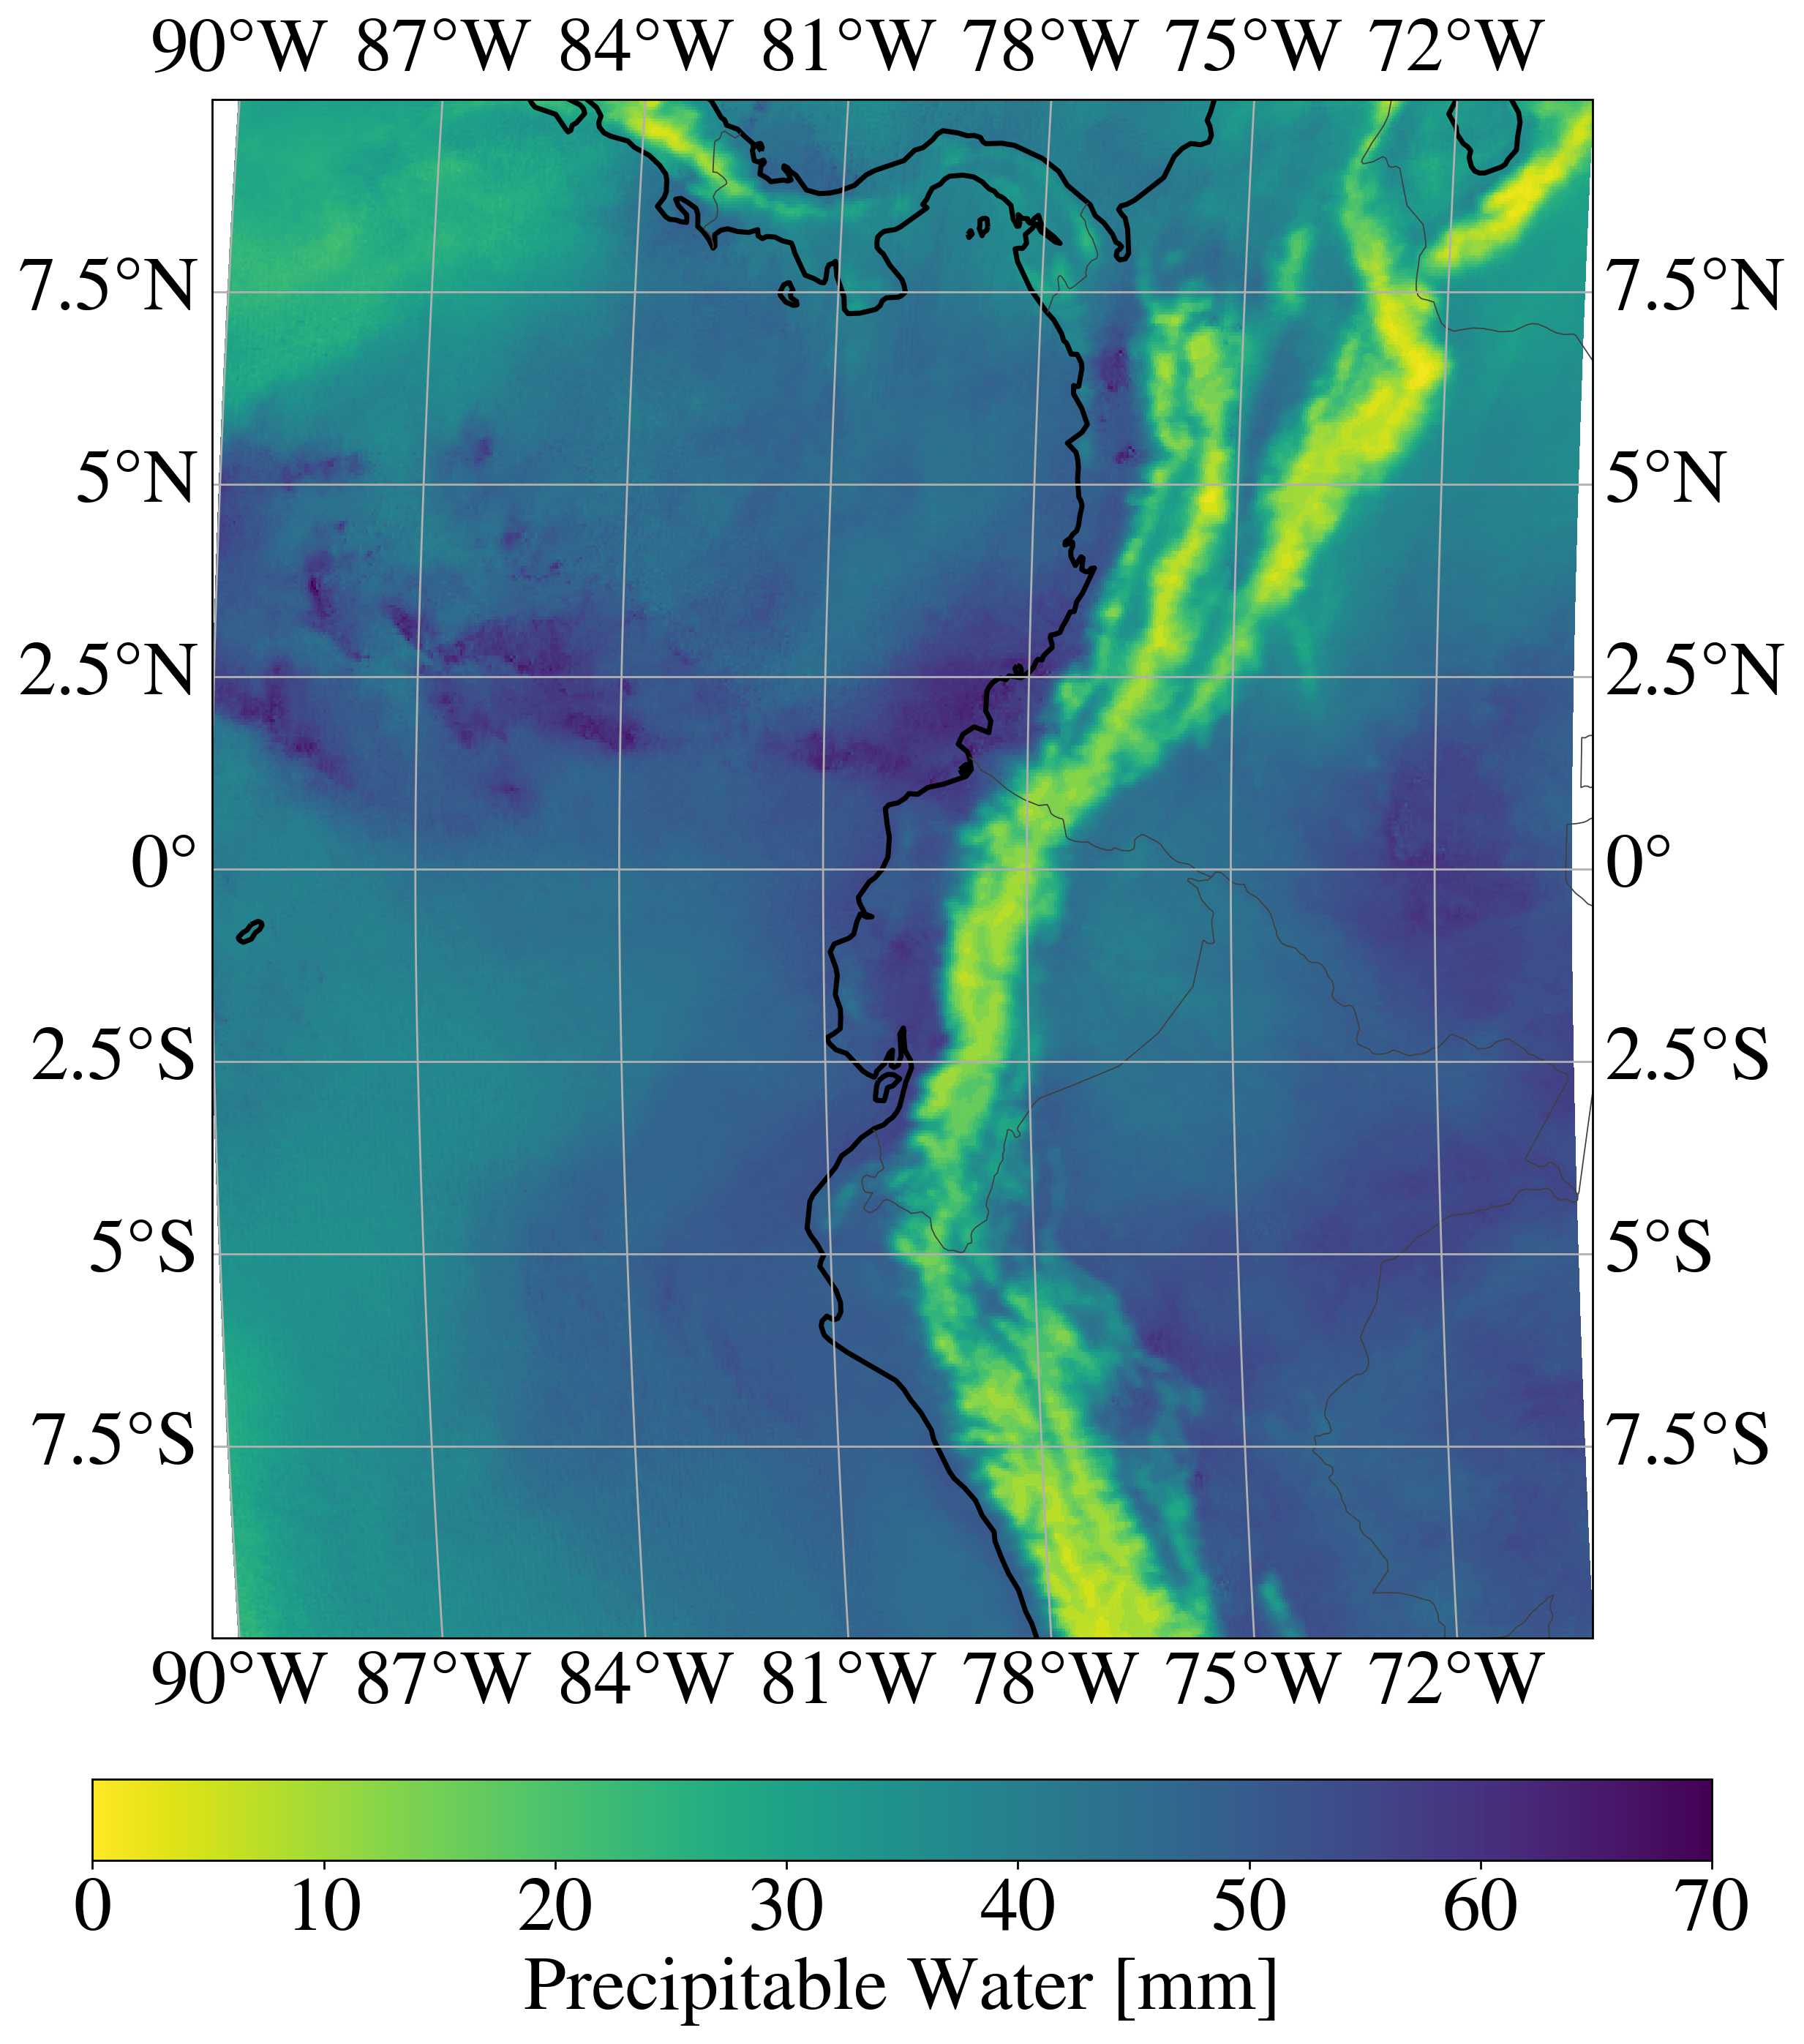

In [101]:
# Assuming datasets is a list of xarray datasets
ds1 = datasets[1]
fz = 12
vmin = vmin0
vmax = vmax0

# Define the region to zoom into (e.g., specific lat/lon bounds)
# Define the region to zoom into (e.g., specific lat/lon bounds)
zoom_extent = {
    'lon_min': lon0,
    'lon_max': lon1,
    'lat_min': lat0,
    'lat_max': lat1
}

increase_factor = 2.5  # Factor to increase the figsize, fz, and DPI

fz = 12 * increase_factor  # Font size
reversed_viridis = plt.cm.get_cmap('viridis_r')  # Reversed viridis colormap

for var in ds1.data_vars:
    # Subset the data using the specified extent
    data_subset = ds1[var].sel(
        lon=slice(zoom_extent['lon_min'], zoom_extent['lon_max']),
        lat=slice(zoom_extent['lat_min'], zoom_extent['lat_max'])
    )
    
    fig, ax = plt.subplots(figsize=(10 * increase_factor, 5 * increase_factor), 
                           subplot_kw={'projection': ccrs.Robinson()}, dpi=100 * increase_factor)
    
    # Plot the data with the viridis colormap
    data_plot = data_subset.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reversed_viridis, 
                                 vmin=vmin, vmax=vmax, add_colorbar=False, add_labels=False)
    
    # Add horizontal colorbar below the plot
    cbar = plt.colorbar(data_plot, ax=ax, orientation='horizontal', fraction=0.046, pad=0.08)
    cbar.ax.tick_params(labelsize=fz)
    cbar.set_label('Precipitable Water [mm]', fontsize=fz)
    
    # Add coastlines and borders
    ax.coastlines(linewidth=2.0, edgecolor='0.25')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='0.25')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True)
    gl.xlabel_style = {'size': fz}
    gl.ylabel_style = {'size': fz}
    
    # Set the extent to match the zoomed region
    ax.set_extent([zoom_extent['lon_min'], zoom_extent['lon_max'], 
                   zoom_extent['lat_min'], zoom_extent['lat_max']], 
                   crs=ccrs.PlateCarree())
    
    # Set title
    #ax.set_title(var, loc='left', pad=-0.1, fontsize=fz)
    
    # Show plot
    plt.show()

In [73]:
# Load the dataset and select the variable
for var in ds1.data_vars:
    var0 = ds1[var]
# Load the latitude and longitude grids
lat = ds1['lat']
lon = ds1['lon']

In [74]:
# Define the target resolution (1 degree)
target_resolution = 1.0

# Subsample the latitude and longitude to create a coarsened grid
coarsened_lat = lat[::int(target_resolution / np.abs(lat[1] - lat[0]))]
coarsened_lon = lon[::int(target_resolution / np.abs(lon[1] - lon[0]))]

In [76]:
# Create a regridder object
regridder = xe.Regridder(ds1, {'lat': coarsened_lat, 'lon': coarsened_lon}, method='bilinear')

# Perform the interpolation
coarsened_var_data = regridder(var0)

/tmp/ipykernel_3748553/364980459.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reversed_viridis = plt.cm.get_cmap('viridis_r')  # Reversed viridis colormap


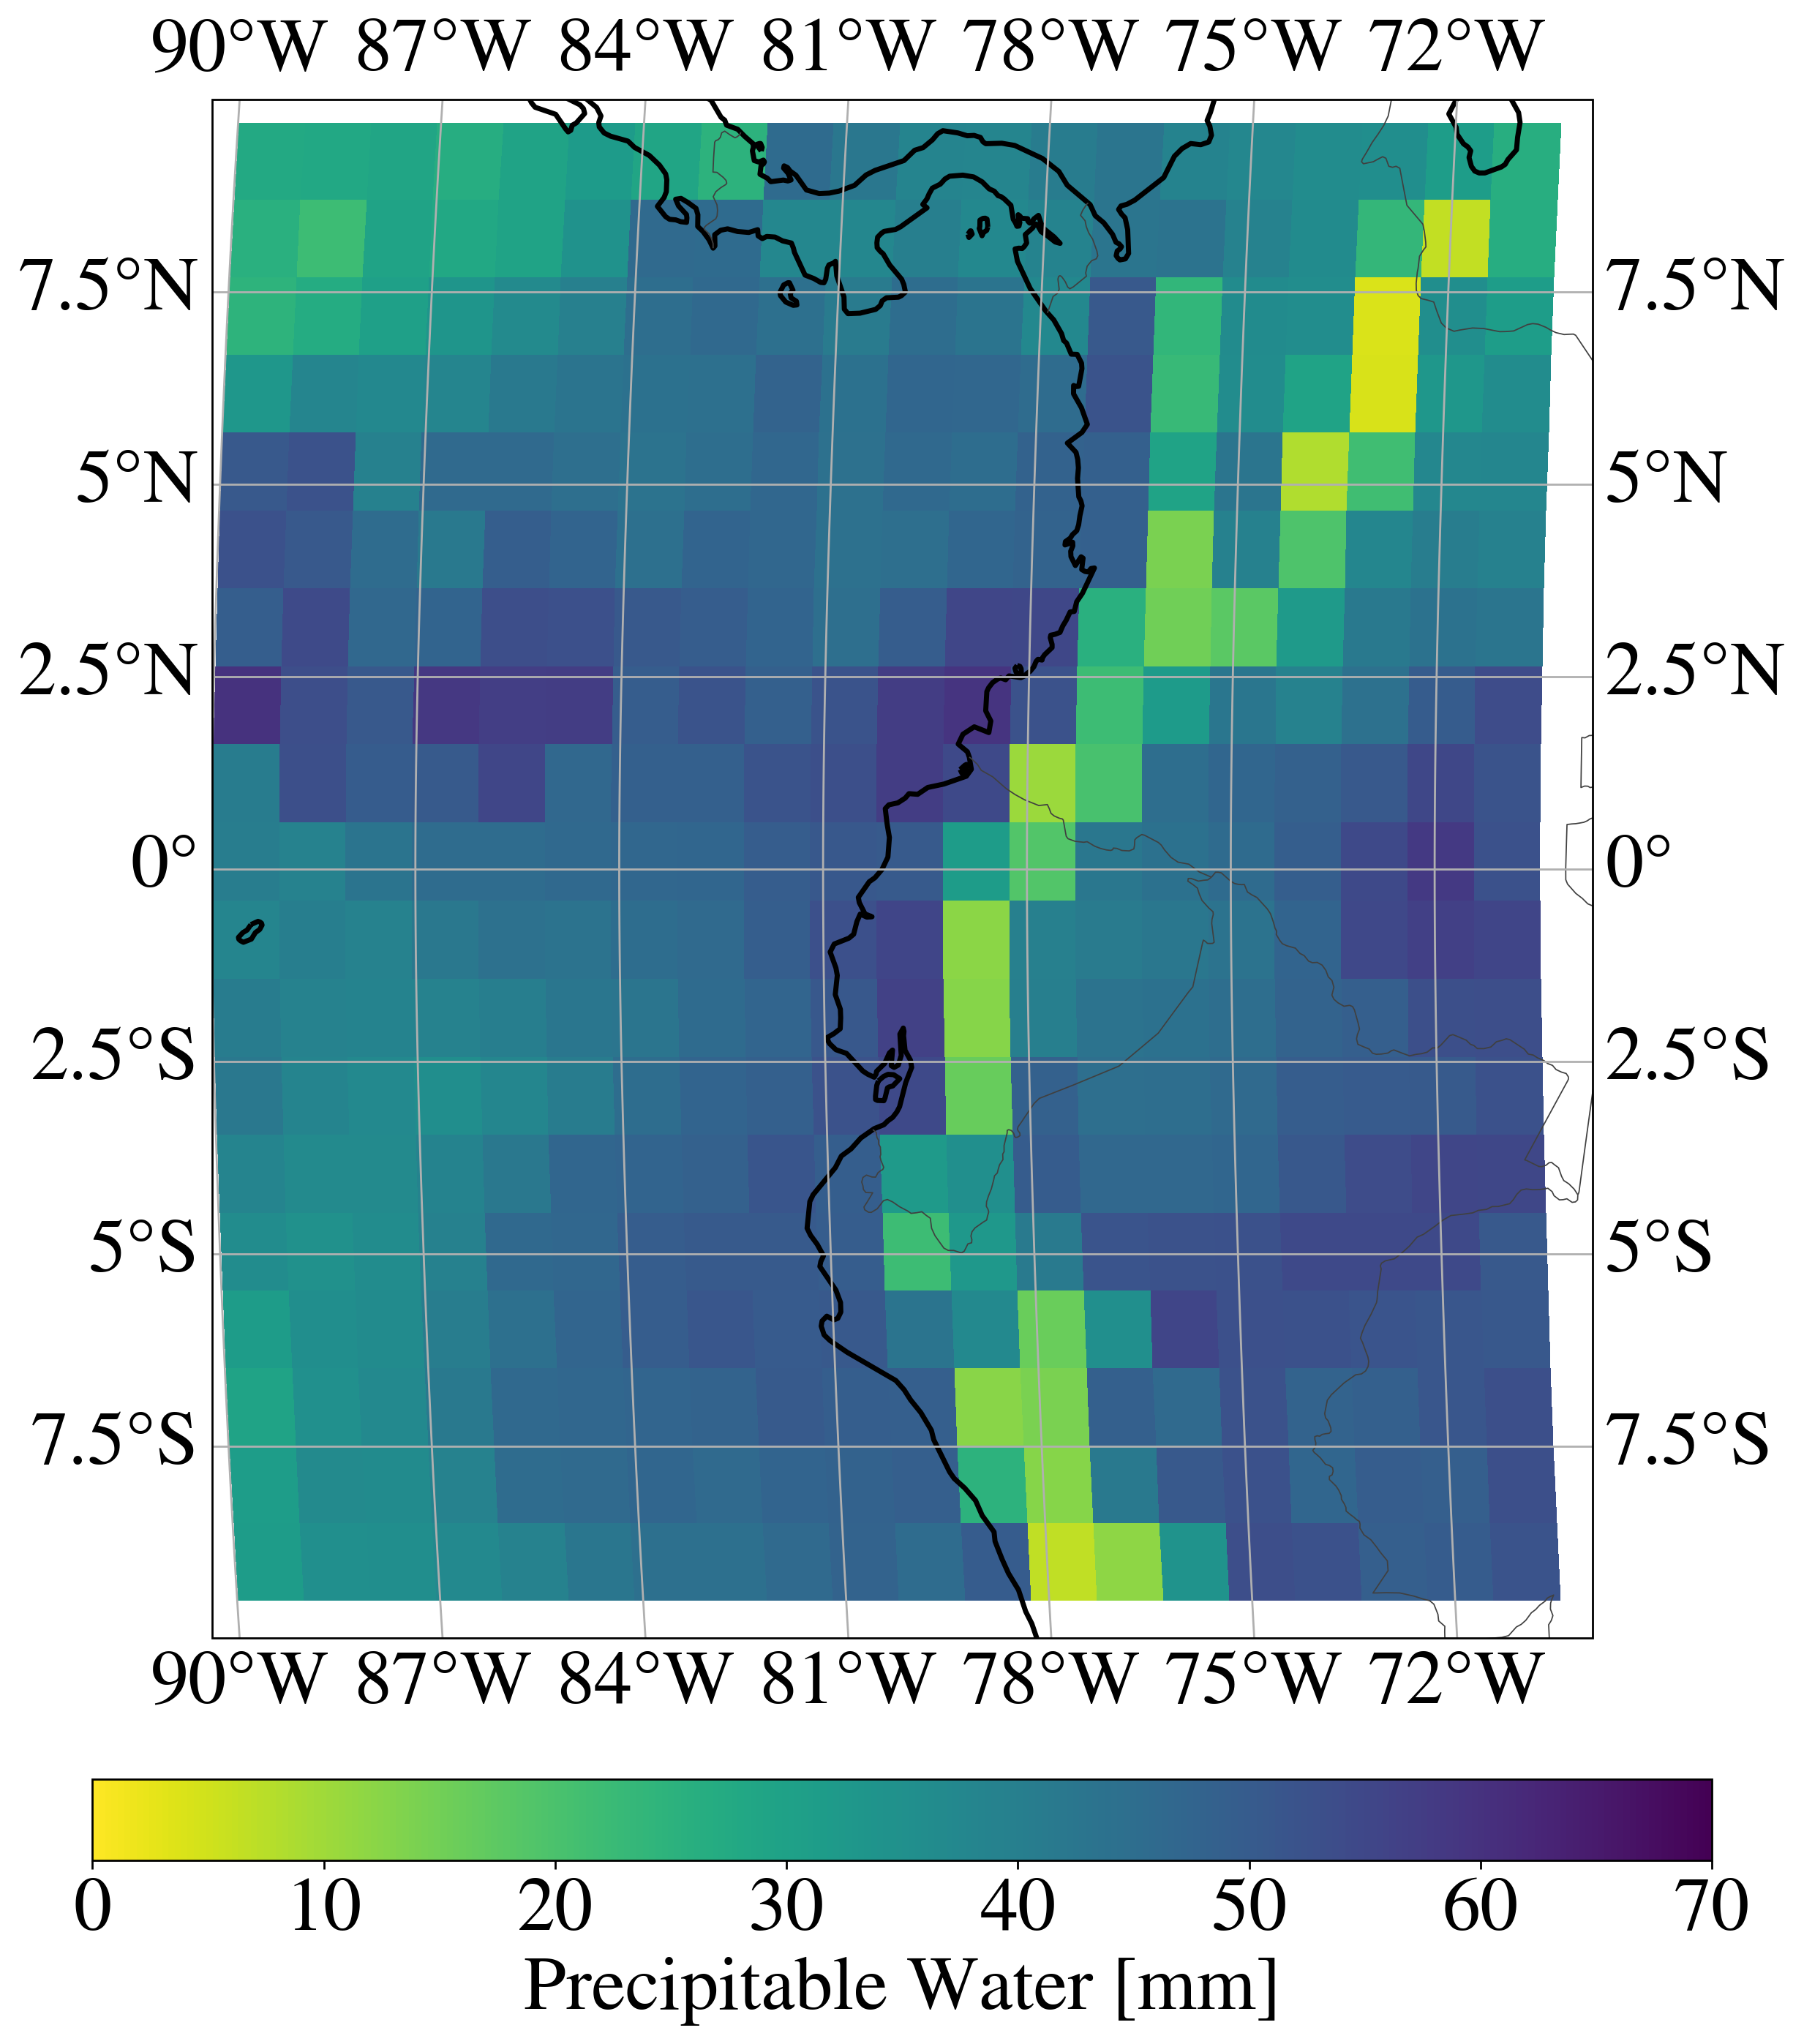

In [100]:
# Define the region to zoom into (e.g., specific lat/lon bounds)
# Define the region to zoom into (e.g., specific lat/lon bounds)
zoom_extent = {
    'lon_min': lon0,
    'lon_max': lon1,
    'lat_min': lat0,
    'lat_max': lat1
}

increase_factor = 2.5  # Factor to increase the figsize, fz, and DPI

fz = 12 * increase_factor  # Font size
vmin = vmin0
vmax = vmax0
reversed_viridis = plt.cm.get_cmap('viridis_r')  # Reversed viridis colormap

# Plot the coarsened data
for var in ds1.data_vars:
    # Subset the data using the specified extent
    data_subset = coarsened_var_data.sel(
        lon=slice(zoom_extent['lon_min'], zoom_extent['lon_max']),
        lat=slice(zoom_extent['lat_min'], zoom_extent['lat_max'])
    )
    
    fig, ax = plt.subplots(figsize=(10*increase_factor, 5*increase_factor), 
                           subplot_kw={'projection': ccrs.Robinson()}, dpi=100*increase_factor)
    
    # Plot the data with the viridis colormap
    data_plot = data_subset.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reversed_viridis, 
                                 vmin=vmin, vmax=vmax, add_colorbar=False, add_labels=False)
    
    # Add horizontal colorbar below the plot
    cbar = plt.colorbar(data_plot, ax=ax, orientation='horizontal', fraction=0.046, pad=0.08)
    cbar.ax.tick_params(labelsize=fz)
    cbar.set_label('Precipitable Water [mm]', fontsize=fz)
    
    # Add coastlines and borders
    ax.coastlines(linewidth=2.0, edgecolor='0.25')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='0.25')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True)
    gl.xlabel_style = {'size': fz}
    gl.ylabel_style = {'size': fz}
    
    # Set the extent to match the zoomed region
    ax.set_extent([zoom_extent['lon_min'], zoom_extent['lon_max'], 
                   zoom_extent['lat_min'], zoom_extent['lat_max']], 
                   crs=ccrs.PlateCarree())
    
    # Set title
    #ax.set_title(var, loc='left', pad=-0.1, fontsize=fz)
    
    # Show plot
    plt.show()

## (OLD) Cloud fraction with DYAMOND

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/Arthur_04_26/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


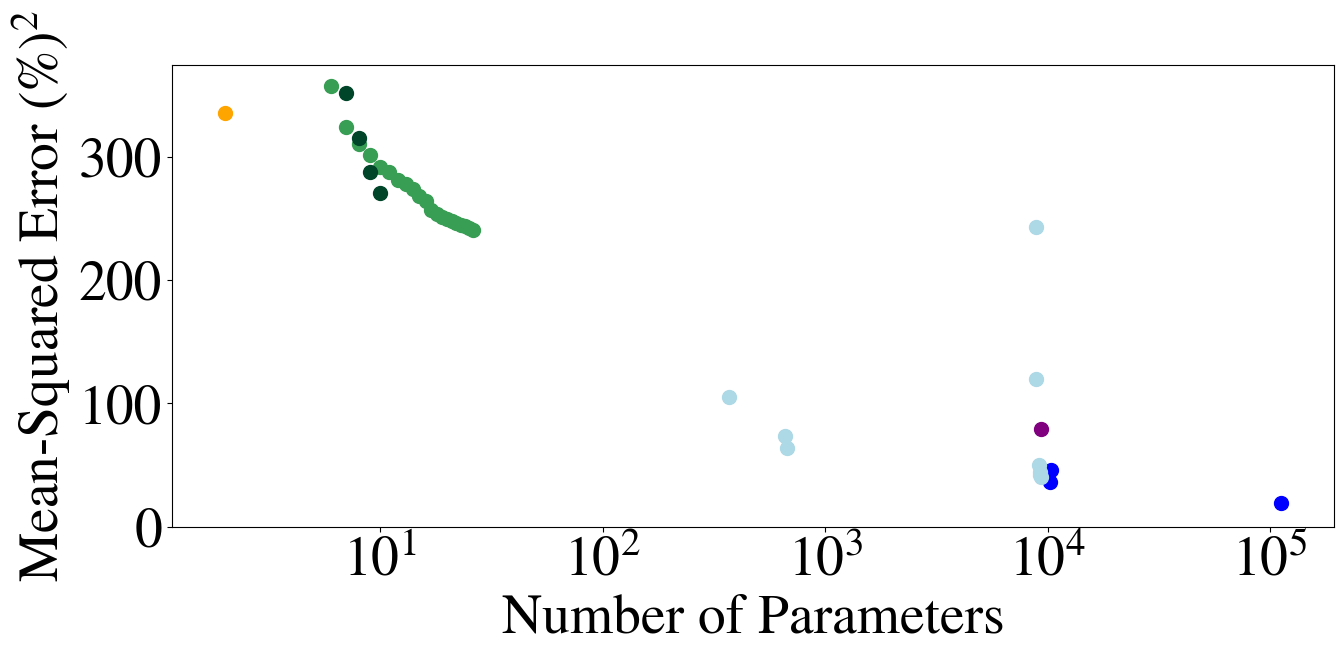

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

# CS = ax.contour(x_lognparam, y_mse, BIC.T/1e9,zorder=0)
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in dyamond['Complexity/Number of parameters'].keys():
    if 'lin' in k: col = Green3_cmap(1)
    elif 'grid_search' in k: col = 'orange'
    elif 'pol_deg_2' in k: col = Green3_cmap(2)
    elif 'pol_deg_3' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    elif 'seq_feat_sel_NN' in k: col = 'lightblue'
    else: col = 'b'
    ax.scatter(np.log10(dyamond['Complexity/Number of parameters'][k]),
               dyamond['MSE scores on validation set'][k],
               s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

ax.set_ylim((0,375))

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

## Cloud fraction

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/Arthur_04_26/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


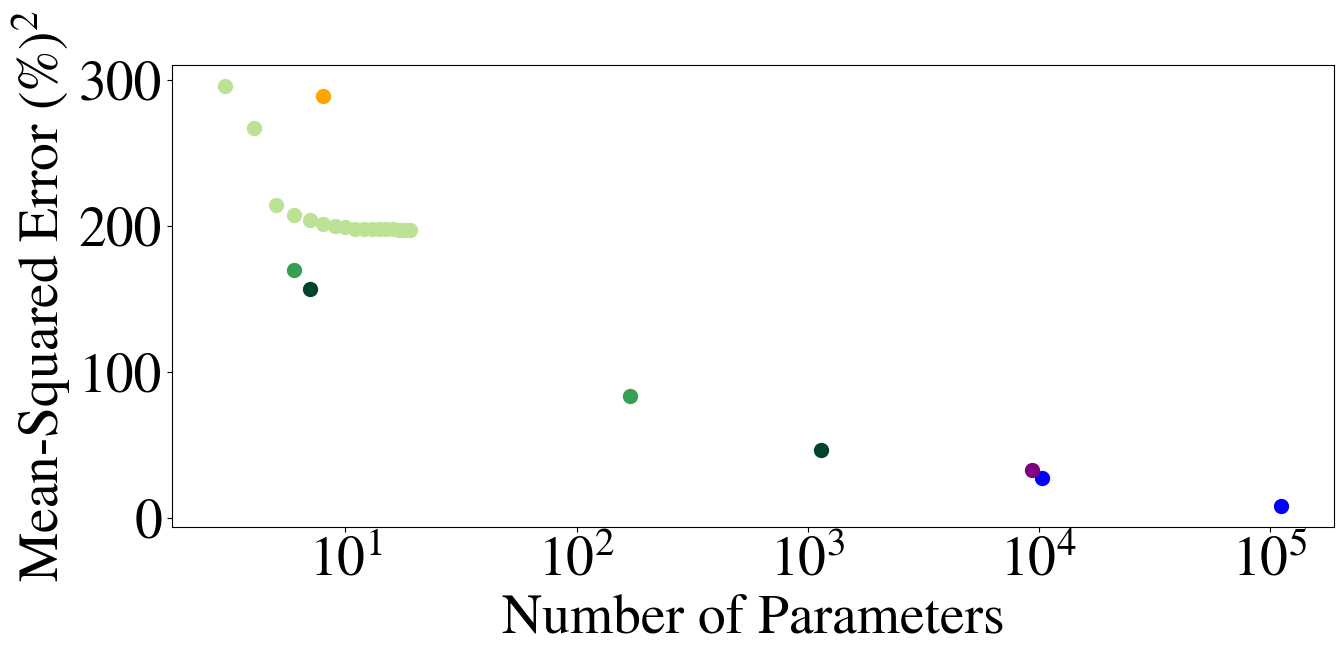

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

# CS = ax.contour(x_lognparam, y_mse, BIC.T/1e9,zorder=0)
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in mse_scores.keys():
    if 'lin' in k: col = Green3_cmap(1)
    elif 'sq' in k: col = 'orange'
    elif 'pol_deg_2' in k: col = Green3_cmap(2)
    elif 'pol_deg_3' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'b'
    ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

In [22]:
mse_scores.keys()

dict_keys(['column_NN', 'region_NN', 'cell_NN', 'pol_deg_3', 'pol_deg_3_feat_6', 'pol_deg_2', 'pol_deg_2_feat_5', 'lin_2', 'lin_3', 'lin_4', 'lin_5', 'lin_6', 'lin_7', 'lin_8', 'lin_9', 'lin_10', 'lin_11', 'lin_12', 'lin_13', 'lin_14', 'lin_15', 'lin_16', 'lin_17', 'lin_18', 'sq_man_tun'])

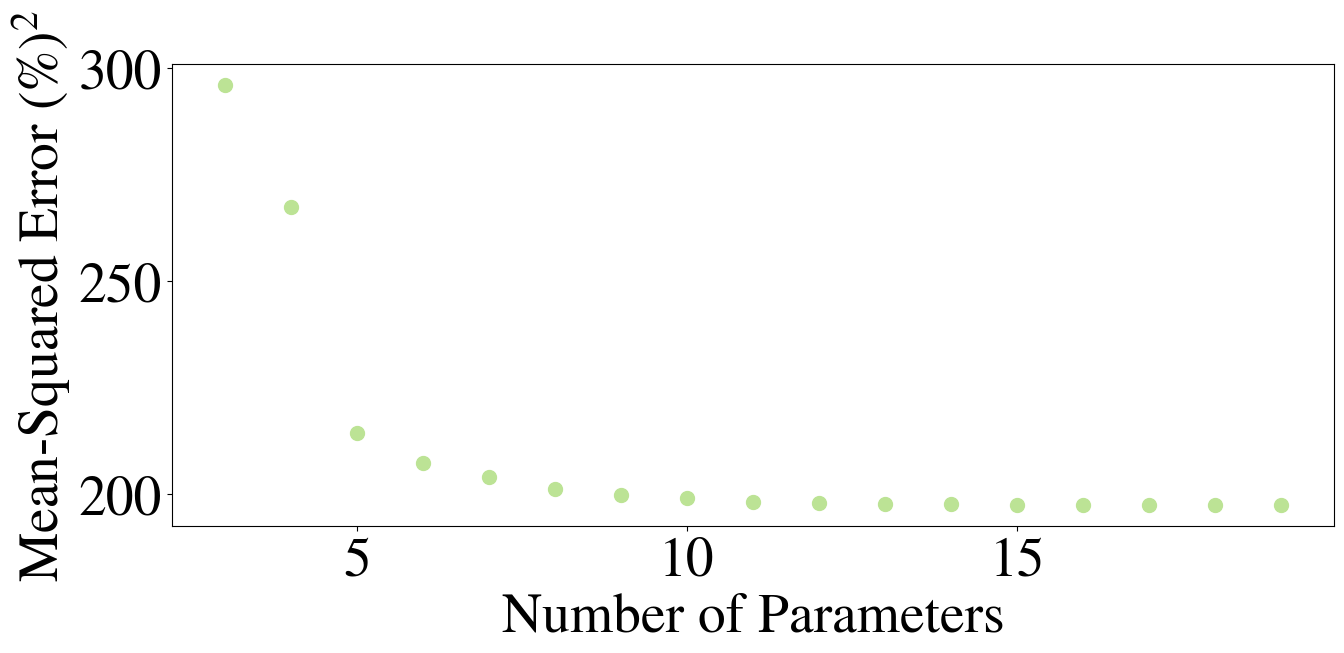

In [23]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

for k in mse_scores.keys():
    if 'lin' in k: 
        col = Green3_cmap(1)
        ax.scatter(no_param[k],mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/Arthur_04_26/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


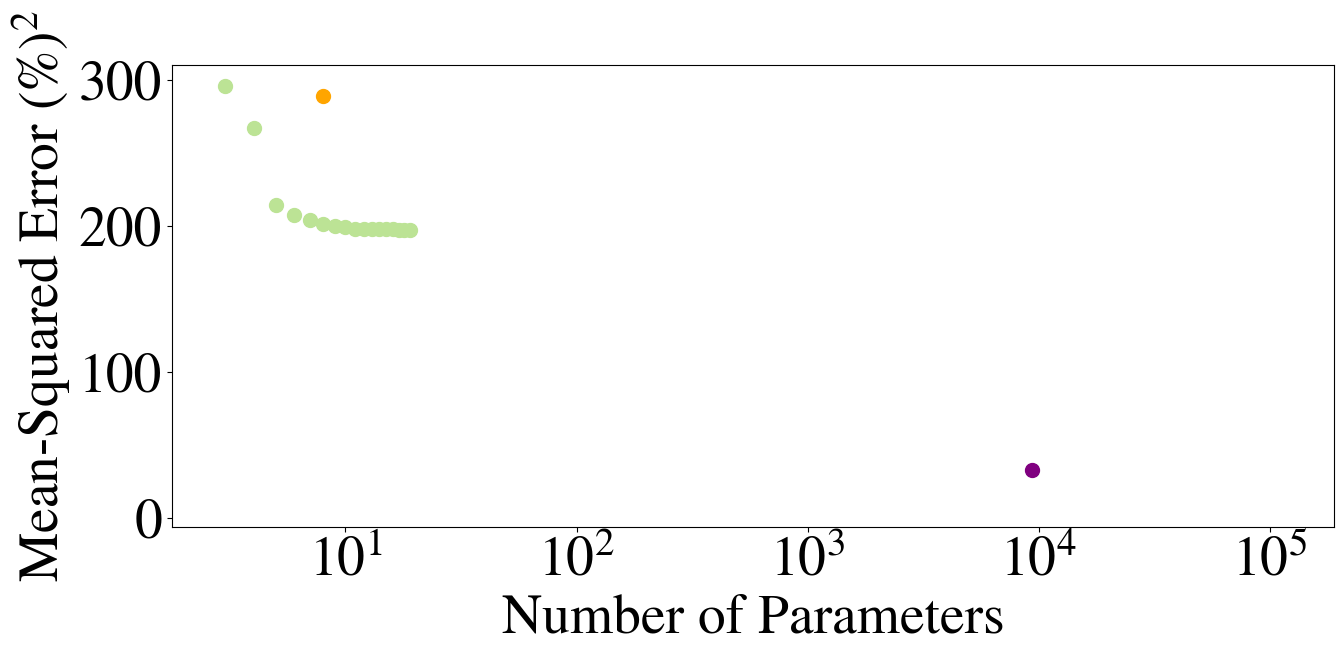

In [24]:
fig, ax = plt.subplots(1,1,figsize=(15,6))



for k in mse_scores.keys():
    plot = True
    if 'lin' in k: col = Green3_cmap(1)
    elif 'sq' in k: col = 'orange'
    elif 'cell_NN' in k: col = 'purple'
    else: plot=False
    if plot: ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
ax.set_ylim(YLIM0); ax.set_xlim(XLIM0)
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);



NameError: name 'x_lognparam' is not defined

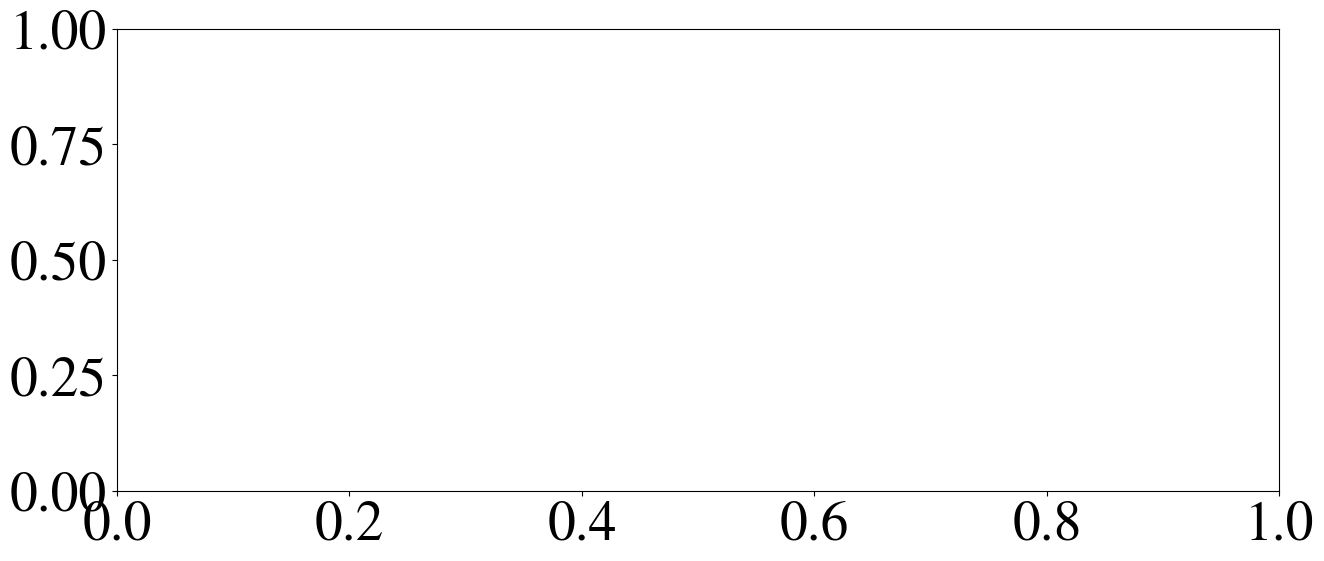

In [25]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

CS = ax.contourf(x_lognparam, y_mse, AIC.T/1e9,zorder=0,cmap='Blues')
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in ['sq_man_tun','cell_NN']:
    if 'sq' in k: col = 'orange'
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'b'
    ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
ax.set_ylim(YLIM0); ax.set_xlim(XLIM0)
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

AIC = 2k + n$\log10\left(MSE\right)$    
BIC = k $\ln\left(n\right)$ + n$\log10\left(MSE\right)$  

In [ ]:
n_samples = 8.8e8

In [ ]:
x_lognparam = np.linspace(0,5.25,1000)
y_mse = np.linspace(5,300,200)
AIC = 2*np.outer(10**x_lognparam,y_mse**0)+n_samples*np.outer(x_lognparam**0,np.log10(y_mse))
BIC = np.log(n_samples)*np.outer(10**x_lognparam,y_mse**0)+n_samples*np.outer(x_lognparam**0,np.log10(y_mse))

## SW radiation with GFS

In [ ]:
Ryan_GFS_models.keys()

Index(['model_type', 'model_hyperparams', 'num_model_params',
       'shortwave_surface_down_flux_mae_w_m02',
       'shortwave_surface_down_flux_mse_w2_m04'],
      dtype='object')

In [ ]:
set(Ryan_GFS_models['model_type'])

{'cnn', 'dense_net', 'linear_regression', 'u_net', 'u_net_plusplus'}

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


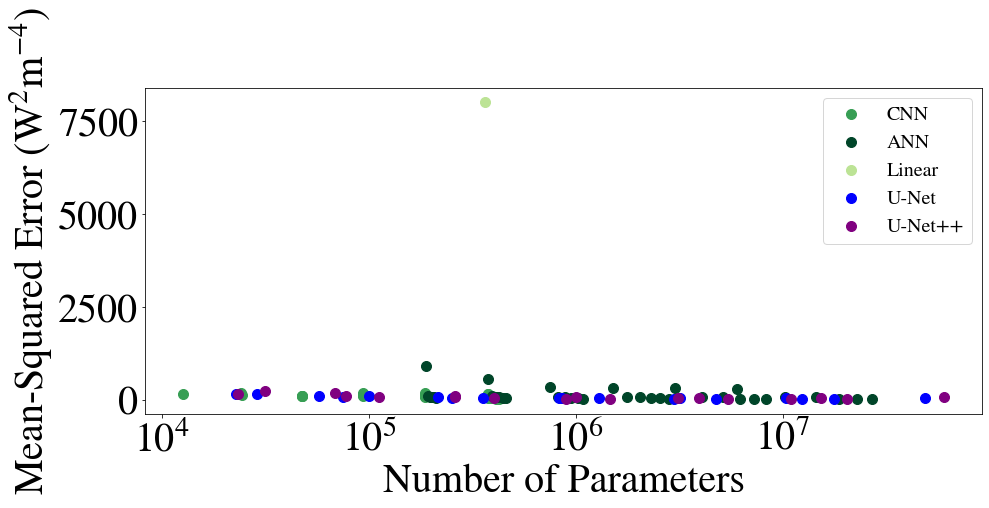

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

LR_0 = 1; CNN_0 = 1; ANN_0 = 1; UN_0 = 1; UNpp_0 = 1;
for i in range(Ryan_GFS_models.shape[0]):
    plot = True
    if Ryan_GFS_models['model_type'][i]=='linear_regression': 
        col = Green3_cmap(1); 
        if LR_0==1: label = 'Linear'; LR_0 = 0; 
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='cnn': 
        col = Green3_cmap(2); 
        if CNN_0==1: label = 'CNN'; CNN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='dense_net': 
        col = Green3_cmap(3); 
        if ANN_0==1: label = 'ANN'; ANN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='u_net': 
        col = 'blue'; 
        if UN_0==1: label = 'U-Net'; UN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='u_net_plusplus': 
        col = 'purple'; 
        if UNpp_0==1: label = 'U-Net++'; UNpp_0 = 0;
        else: label='';
    if plot: ax.scatter(np.log10(Ryan_GFS_models['num_model_params'][i]),
                        Ryan_GFS_models['shortwave_surface_down_flux_mse_w2_m04'][i],
                        s=siz,color=col,zorder=1,label=label)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()
plt.legend(fontsize=fz/2)

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);
#ax.set_ylim((0,180))
YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

## SW radiation

In [ ]:
SW.keys()

dict_keys(['emp201920', 'Unet++', 'Lin_1', 'Lin_2', 'Lin_3', 'Lin_4', 'Lin_5', 'Lin_6', 'Lin_7', 'Lin_8', 'Lin_9', 'Lin_10', 'Quad_1', 'Quad_2', 'Quad_3', 'Quad_4', 'Quad_5', 'Quad_6', 'Quad_7', 'Quad_8', 'Quad_9', 'Quad_78', 'Cubic_1', 'Cubic_2', 'Cubic_3', 'Cubic_4', 'Cubic_5', 'Cubic_6', 'Cubic_7', 'Cubic_364'])

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


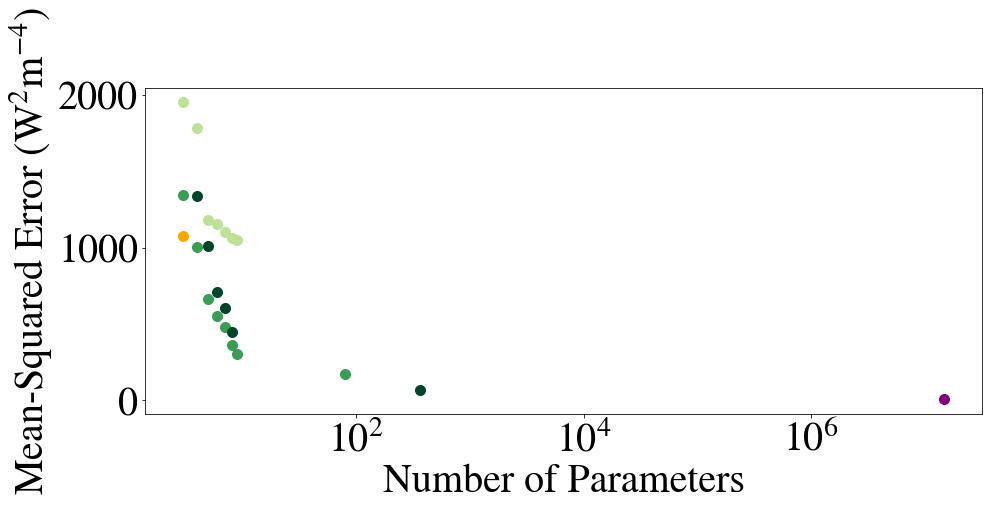

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))


for k in SW.keys():
    plot = True
    if '_1' in k: plot = False
    elif '_2' in k: plot = False
    elif 'Lin' in k: col = Green3_cmap(1)
    elif 'emp' in k: col = 'orange'
    elif 'Quad' in k: col = Green3_cmap(2)
    elif 'Cubic' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'purple'
    if plot: ax.scatter(np.log10(SW[k]['number_p']),SW[k]['MSE_train'],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


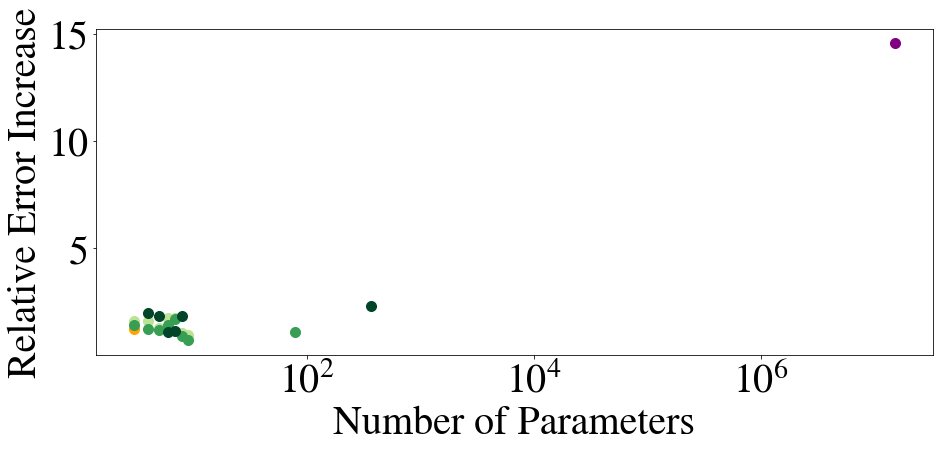

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))


for k in SW.keys():
    plot = True
    if '_1' in k: plot = False
    elif '_2' in k: plot = False
    elif 'Lin' in k: col = Green3_cmap(1); plot = True;
    elif 'emp' in k: col = 'orange'
    elif 'Quad' in k: col = Green3_cmap(2); plot = True; 
    elif 'Cubic' in k: col = Green3_cmap(3); plot = True;
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'purple'
    if plot: 
        ax.scatter(np.log10(SW[k]['number_p']),(SW[k]['MSE_test']-SW[k]['MSE_train'])/SW[k]['MSE_train'],
                   s=siz,color=col,zorder=1)
plt.ylabel('Relative Error Increase')
plt.xlabel('Number of Parameters')
# ax.set_xlim(XLIM0); ax.set_ylim(YLIM0);
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

In [ ]:
SW['Lin_5']

{'MSE_train': 1176.7370838317738, 'MSE_test': 2693.293029128334, 'number_p': 5}

## Subgrid-scale thermodynamics

In [ ]:
ST

{'LR': {'number_p': 7800, 'MSE_train': 288, 'MSE_test': 785},
 'NN': {'number_p': 122872, 'MSE_train': 172, 'MSE_test': 2242},
 'LR_CI': {'number_p': 7800, 'MSE_train': 294, 'MSE_test': 671},
 'NN_CI': {'number_p': 122872, 'MSE_train': 169, 'MSE_test': 425},
 'Sample_train': 48000000.0,
 'Sample_test': 48000000.0}

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


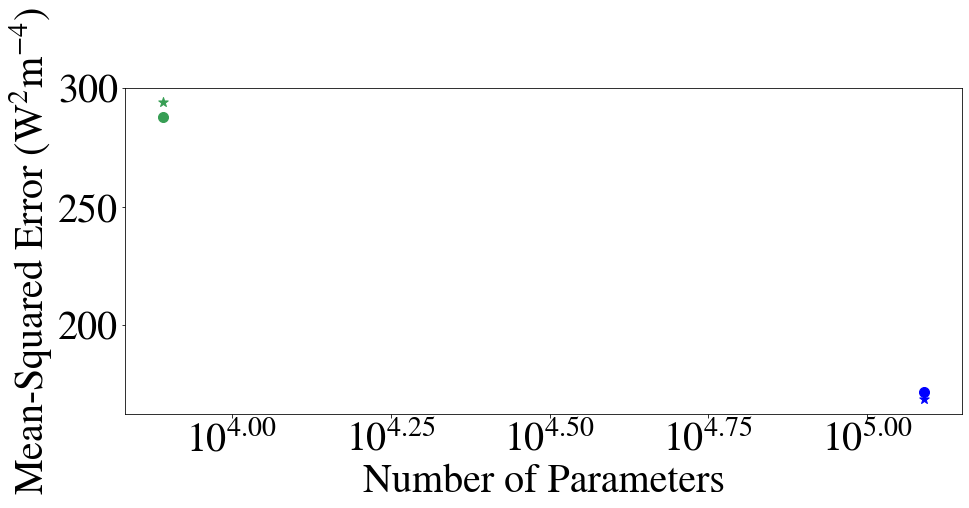

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

for k in ST.keys():
    plot = True
    if 'LR' in k: col = Green3_cmap(2)
    elif 'NN' in k: col = 'b'
    elif 'Sample' in k: plot=False
    if 'CI' in k: marker = '*'
    else: marker = 'o'
    if plot: ax.scatter(np.log10(ST[k]['number_p']),
               ST[k]['MSE_train'],marker=marker,
               s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()
# ax.set_xlim(XLIM0)
# ax.set_ylim(YLIM0)

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

# YLIM0 = ax.get_ylim()
# XLIM0 = ax.get_xlim()